In [1]:
# Amira Abdel-Rahman
# (c) Massachusetts Institute of Technology 2021

In [2]:
using Plots
using SparseArrays
using LinearAlgebra

In [6]:
using Images, ImageSegmentation
using GLMakie
using Makie

In [19]:
include("./julia/include/_topologyOptimization.jl")


Loaded Topology Optimization Library!


# Connectivity/Continuity Constraint

In [66]:
nelx=50
nely=50
nelz=50
gr(size=(300,300))



Plots.GRBackend()

In [247]:
H,Hs = filtering2d(nelx, nely, nelx*nely, 2);


In [249]:
## Connectivity matrix for continuity 
lrmin = 2;
iH = ones(convert(Int,nelx*nely*(2*(ceil(lrmin)-1)+1)^2),1)
jH = ones(Int,size(iH))
sH = zeros(size(iH))
k = 0;
for i1 = 1:nelx
    for j1 = 1:nely
        e1 = (i1-1)*nely+j1
        for i2 = max(i1-(ceil(lrmin)-1),1):min(i1+(ceil(lrmin)-1),nelx)
            for j2 = max(j1-(ceil(lrmin)-1),1):min(j1+(ceil(lrmin)-1),nely)
                e2 = (i2-1)*nely+j2
                if e1 == e2
                    continue;
                end
                k = k+1
                iH[k] = e1
                jH[k] = e2
                sH[k] = 1
            end
        end
    end
end
L = sparse(vec(iH),vec(jH),vec(sH));
M =  sparse(repeat(sum(L, dims=2), 1, size(L)[2]));
E = sparse(1.0I, size(L)[1], size(L)[2]);
L = E - L./M;
Plots.heatmap(Array(L))

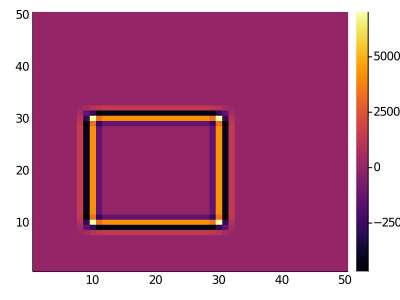

In [253]:
Plots.heatmap(reshape(dft,nelx,nely))

In [248]:
## Continuity constraint
Nei = 1:nely;
LL = L;
kk = 2*(nely*nelx); # controlling the smoothness of the time field
A = LL*xPhys[:];
B = A.^2/(nely*nelx);
fval = [kk*(sum(B)-1.0e-6)];
print_out = [fval[end]/kk];
dft = kk*2*LL'*A;
# dft = H*(dft./Hs)/(nely*nelx);
dfdx = [zeros(1, nely*nelx) dft'];

## Start points
fval = [fval; (xPhys[Nei]'[:] .- 1.0e-9)];
ss = zeros(length(Nei), nely*nelx);
for ii = 1 : length(Nei)
    ss[ii, Nei[ii]] = 1;
end
dfdx = [dfdx; zeros(length(Nei), nely*nelx) (H*(ss'./repeat(Hs, 1, length(Nei))))'];
   

In [262]:
xPhys=zeros(nelx,nely)
xPhys[10:30,10:30].=1.0
# display(heatmap(xPhys))
fval,dft=connectivityConstraint(xPhys,nelx,nely,L)
display(fval/sum(xPhys))
display(fval)
display(sum(dft))

# display(heatmap(reshape(dft,nelx,nely)))

4999.999988662132

2.204999995e6

NaN

In [263]:
xPhys1=zeros(nelx,nely)
xPhys1[10:20,10:20].=1.0
xPhys1[30:40,30:40].=1.0
# display(heatmap(xPhys1))
fval1,dft1=connectivityConstraint(xPhys1,nelx,nely,L)
display(fval1/sum(xPhys1))
display(fval1)
display(sum(dft1))


4999.999979338843

1.209999995e6

NaN

In [264]:
xPhys2=zeros(nelx,nely)
xPhys2[10:15,10:15].=1.0
xPhys2[20:25,20:25].=1.0
xPhys2[30:35,30:35].=1.0

# display(heatmap(xPhys2))
fval2,dft2=connectivityConstraint(xPhys2,nelx,nely,L)
display(fval2/sum(xPhys2))
display(fval2)
display(sum(dft2))


4999.999953703704

539999.995

NaN

In [261]:
xPhys3=ones(nelx,nely)
xPhys3[10:30,10:30].=0.0
# display(heatmap(xPhys3))
fval3,dft3=connectivityConstraint(xPhys3,nelx,nely,L)
display(fval3/sum(xPhys3))
display(fval3)
display(sum(dft3))


4999.999997571637

1.0294999995000001e7

NaN

In [293]:
include("./julia/include/_topologyOptimization.jl")



Loaded Topology Optimization Library!


In [295]:
x=xPhys1
fval,dft=connectivityConstraint(x,L,H,Hs)
fval

122.495

In [274]:
xPhys4=zeros(nelx,nely)
xPhys4[10:15,10:15].=1.0;
xPhys4[16:25,16:25].=1.0;



---

# 3D

In [173]:
xPhys13D=zeros(nelx,nely,nelz);
xPhys13D[10:20,10:20,10:20].=1.0;
xPhys13D[30:40,30:40,10:20].=1.0;
seg3D = fast_scanning(xPhys13D, 0.5);
display(segment_labels(seg3D));
# volume(labels_map(seg3D), algorithm = :absorption,transparency=true,colorrange=(1, 3))
sc = Scene(resolution = (300, 300))
sc=volume!(labels_map(seg3D), algorithm = :iso, isorange = 1.0, isovalue = 2.0,colorrange=(1, 3))
sc=volume!(labels_map(seg3D), algorithm = :iso, isorange = 1.0, isovalue = 3.0,colorrange=(1, 3))

3-element Array{Int64,1}:
 1
 2
 3

┌ Warning: Showing scene as text. This happens because `AbstractPlotting.inline!(true)` is set.
│ This needs to be false to show a plot in a window when in the REPL.
└ @ AbstractPlotting /Users/amiraabdel-rahman/.julia/packages/AbstractPlotting/ru2ib/src/display.jl:135


# RERUN OLD CODE

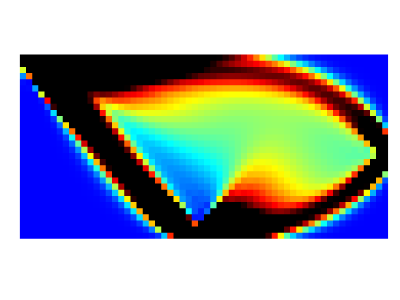

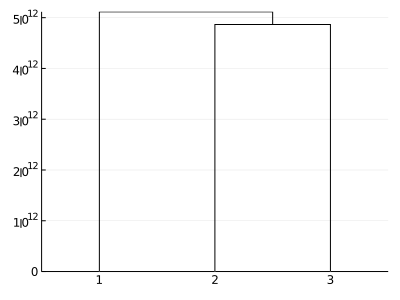

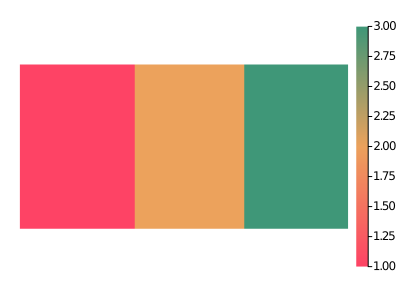

Mask 1 with density 0.5 occupies 35.0% of the macrostructure.
Mask 2 with density 0.5 occupies 33.33% of the macrostructure.
Mask 3 with density 0.5 occupies 31.67% of the macrostructure.


GKS: character ignored due to unicode error
GKS: character ignored due to unicode error
GKS: character ignored due to unicode error
GKS: character ignored due to unicode error
GKS: character ignored due to unicode error
GKS: character ignored due to unicode error
GKS: character ignored due to unicode error
GKS: character ignored due to unicode error
GKS: character ignored due to unicode error
GKS: character ignored due to unicode error
GKS: character ignored due to unicode error
GKS: character ignored due to unicode error
GKS: character ignored due to unicode error
GKS: character ignored due to unicode error
GKS: character ignored due to unicode error
GKS: character ignored due to unicode error
GKS: character ignored due to unicode error
GKS: character ignored due to unicode error
GKS: character ignored due to unicode error
GKS: character ignored due to unicode error
GKS: character ignored due to unicode error
GKS: character ignored due to unicode error
GKS: character ignored due to un

1 Obj:-0.0 Macro_Vol:0.5 Micro_Vol:[0.56, 0.56, 0.56] Macro_ch:0.1 Micro_ch:[0.2, 0.2, 0.2]
2 Obj:-0.0 Macro_Vol:0.5 Micro_Vol:[0.5, 0.5, 0.5] Macro_ch:0.1 Micro_ch:[0.2, 0.2, 0.2]
3 Obj:-0.0 Macro_Vol:0.5 Micro_Vol:[0.5, 0.5, 0.5] Macro_ch:0.1 Micro_ch:[0.2, 0.18, 0.2]
4 Obj:-0.0 Macro_Vol:0.5 Micro_Vol:[0.5, 0.5, 0.5] Macro_ch:0.1 Micro_ch:[0.12, 0.14, 0.11]


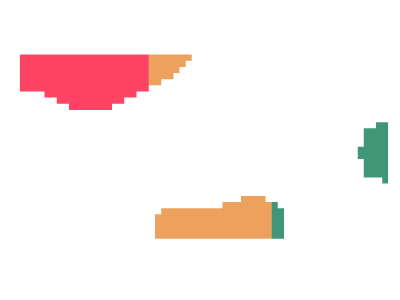

5 Obj:-0.0 Macro_Vol:0.5 Micro_Vol:[0.5, 0.5, 0.5] Macro_ch:0.1 Micro_ch:[0.1, 0.06, 0.09]
6 Obj:-0.0 Macro_Vol:0.5 Micro_Vol:[0.5, 0.5, 0.5] Macro_ch:0.1 Micro_ch:[0.08, 0.07, 0.09]
7 Obj:-0.0 Macro_Vol:0.5 Micro_Vol:[0.5, 0.5, 0.5] Macro_ch:0.09 Micro_ch:[0.08, 0.07, 0.07]
8 Obj:-0.0 Macro_Vol:0.5 Micro_Vol:[0.5, 0.5, 0.5] Macro_ch:0.07 Micro_ch:[0.05, 0.04, 0.06]
9 Obj:-0.0 Macro_Vol:0.5 Micro_Vol:[0.5, 0.5, 0.5] Macro_ch:0.07 Micro_ch:[0.05, 0.02, 0.05]


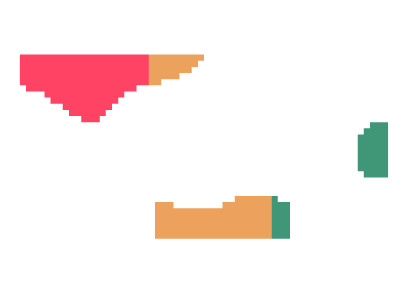

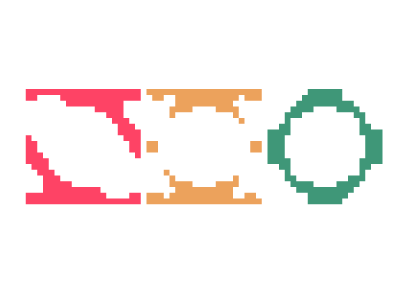

10 Obj:-0.0 Macro_Vol:0.5 Micro_Vol:[0.5, 0.5, 0.5] Macro_ch:0.06 Micro_ch:[0.04, 0.02, 0.05]
11 Obj:-0.0 Macro_Vol:0.5 Micro_Vol:[0.5, 0.5, 0.5] Macro_ch:0.06 Micro_ch:[0.03, 0.02, 0.04]
12 Obj:-0.0 Macro_Vol:0.5 Micro_Vol:[0.5, 0.5, 0.5] Macro_ch:0.05 Micro_ch:[0.03, 0.01, 0.04]
13 Obj:-0.0 Macro_Vol:0.5 Micro_Vol:[0.5, 0.5, 0.5] Macro_ch:0.04 Micro_ch:[0.03, 0.01, 0.04]
14 Obj:-0.0 Macro_Vol:0.5 Micro_Vol:[0.5, 0.5, 0.5] Macro_ch:0.04 Micro_ch:[0.03, 0.01, 0.04]


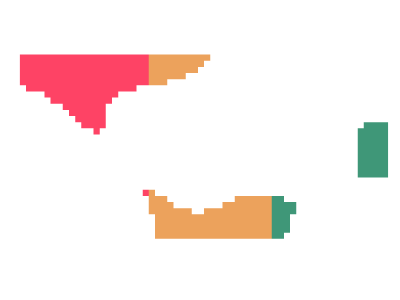

15 Obj:-0.0 Macro_Vol:0.5 Micro_Vol:[0.5, 0.5, 0.5] Macro_ch:0.05 Micro_ch:[0.03, 0.01, 0.03]
16 Obj:-0.0 Macro_Vol:0.5 Micro_Vol:[0.5, 0.5, 0.5] Macro_ch:0.04 Micro_ch:[0.03, 0.01, 0.03]
17 Obj:-0.0 Macro_Vol:0.5 Micro_Vol:[0.5, 0.5, 0.5] Macro_ch:0.04 Micro_ch:[0.03, 0.01, 0.03]
18 Obj:-0.0 Macro_Vol:0.5 Micro_Vol:[0.5, 0.5, 0.5] Macro_ch:0.04 Micro_ch:[0.03, 0.01, 0.02]
19 Obj:-0.0 Macro_Vol:0.5 Micro_Vol:[0.5, 0.5, 0.5] Macro_ch:0.03 Micro_ch:[0.02, 0.01, 0.02]


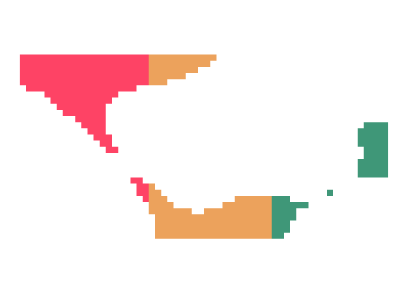

20 Obj:-0.0 Macro_Vol:0.5 Micro_Vol:[0.5, 0.5, 0.5] Macro_ch:0.03 Micro_ch:[0.02, 0.01, 0.02]
1 Obj:-0.0 Macro_Vol:0.5 Micro_Vol:[0.5, 0.5, 0.5] Macro_ch:0.1 Micro_ch:[0.2, 0.12, 0.2]
2 Obj:-0.0 Macro_Vol:0.5 Micro_Vol:[0.5, 0.5, 0.5] Macro_ch:0.1 Micro_ch:[0.14, 0.11, 0.13]
3 Obj:-0.0 Macro_Vol:0.5 Micro_Vol:[0.5, 0.5, 0.5] Macro_ch:0.1 Micro_ch:[0.09, 0.09, 0.09]
4 Obj:-0.0 Macro_Vol:0.5 Micro_Vol:[0.5, 0.5, 0.5] Macro_ch:0.1 Micro_ch:[0.07, 0.07, 0.07]


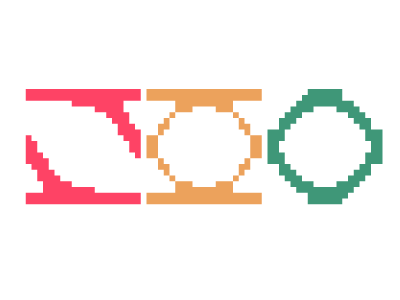

5 Obj:-0.0 Macro_Vol:0.5 Micro_Vol:[0.5, 0.5, 0.5] Macro_ch:0.08 Micro_ch:[0.06, 0.06, 0.05]
6 Obj:-0.0 Macro_Vol:0.5 Micro_Vol:[0.5, 0.5, 0.5] Macro_ch:0.09 Micro_ch:[0.07, 0.06, 0.05]
7 Obj:-0.0 Macro_Vol:0.5 Micro_Vol:[0.5, 0.5, 0.5] Macro_ch:0.08 Micro_ch:[0.04, 0.05, 0.04]
8 Obj:-0.0 Macro_Vol:0.5 Micro_Vol:[0.5, 0.5, 0.5] Macro_ch:0.08 Micro_ch:[0.03, 0.05, 0.04]
9 Obj:-0.0 Macro_Vol:0.5 Micro_Vol:[0.5, 0.5, 0.5] Macro_ch:0.09 Micro_ch:[0.03, 0.05, 0.03]


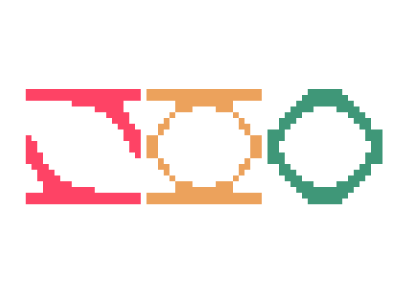

10 Obj:-0.0 Macro_Vol:0.5 Micro_Vol:[0.5, 0.5, 0.5] Macro_ch:0.08 Micro_ch:[0.03, 0.04, 0.03]
11 Obj:-0.0 Macro_Vol:0.5 Micro_Vol:[0.5, 0.5, 0.5] Macro_ch:0.07 Micro_ch:[0.03, 0.04, 0.03]
12 Obj:-0.0 Macro_Vol:0.5 Micro_Vol:[0.5, 0.5, 0.5] Macro_ch:0.07 Micro_ch:[0.03, 0.04, 0.03]
13 Obj:-0.0 Macro_Vol:0.5 Micro_Vol:[0.5, 0.5, 0.5] Macro_ch:0.08 Micro_ch:[0.03, 0.04, 0.02]
14 Obj:-0.0 Macro_Vol:0.5 Micro_Vol:[0.5, 0.5, 0.5] Macro_ch:0.09 Micro_ch:[0.03, 0.03, 0.02]


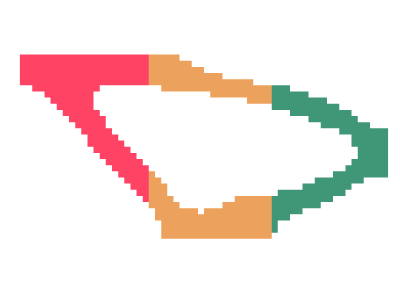

15 Obj:-0.0 Macro_Vol:0.5 Micro_Vol:[0.5, 0.5, 0.5] Macro_ch:0.08 Micro_ch:[0.02, 0.03, 0.02]
16 Obj:-0.0 Macro_Vol:0.5 Micro_Vol:[0.5, 0.5, 0.5] Macro_ch:0.07 Micro_ch:[0.02, 0.03, 0.02]
17 Obj:-0.0 Macro_Vol:0.5 Micro_Vol:[0.5, 0.5, 0.5] Macro_ch:0.07 Micro_ch:[0.02, 0.03, 0.02]
18 Obj:-0.0 Macro_Vol:0.5 Micro_Vol:[0.5, 0.5, 0.5] Macro_ch:0.07 Micro_ch:[0.02, 0.03, 0.01]
19 Obj:-0.0 Macro_Vol:0.5 Micro_Vol:[0.5, 0.5, 0.5] Macro_ch:0.07 Micro_ch:[0.02, 0.03, 0.01]


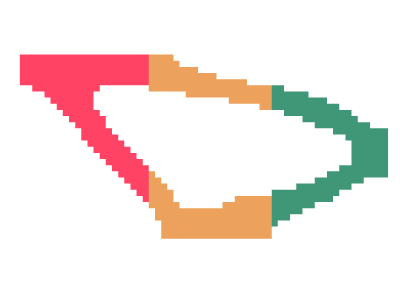

20 Obj:-0.0 Macro_Vol:0.5 Micro_Vol:[0.5, 0.5, 0.5] Macro_ch:0.07 Micro_ch:[0.02, 0.03, 0.01]
1 Obj:-0.0 Macro_Vol:0.5 Micro_Vol:[0.5, 0.5, 0.5] Macro_ch:0.1 Micro_ch:[0.1, 0.16, 0.19]
2 Obj:-0.0 Macro_Vol:0.5 Micro_Vol:[0.5, 0.5, 0.5] Macro_ch:0.1 Micro_ch:[0.08, 0.12, 0.14]
3 Obj:-0.0 Macro_Vol:0.5 Micro_Vol:[0.5, 0.5, 0.5] Macro_ch:0.1 Micro_ch:[0.08, 0.08, 0.12]
4 Obj:-0.0 Macro_Vol:0.5 Micro_Vol:[0.5, 0.5, 0.5] Macro_ch:0.1 Micro_ch:[0.09, 0.08, 0.1]


5 Obj:-0.0 Macro_Vol:0.5 Micro_Vol:[0.5, 0.5, 0.5] Macro_ch:0.1 Micro_ch:[0.09, 0.08, 0.08]
6 Obj:-0.0 Macro_Vol:0.5 Micro_Vol:[0.5, 0.5, 0.5] Macro_ch:0.1 Micro_ch:[0.08, 0.08, 0.07]
7 Obj:-0.0 Macro_Vol:0.5 Micro_Vol:[0.5, 0.5, 0.5] Macro_ch:0.1 Micro_ch:[0.07, 0.07, 0.06]
8 Obj:-0.0 Macro_Vol:0.5 Micro_Vol:[0.5, 0.5, 0.5] Macro_ch:0.1 Micro_ch:[0.06, 0.05, 0.07]
9 Obj:-0.0 Macro_Vol:0.5 Micro_Vol:[0.5, 0.5, 0.5] Macro_ch:0.1 Micro_ch:[0.05, 0.04, 0.08]


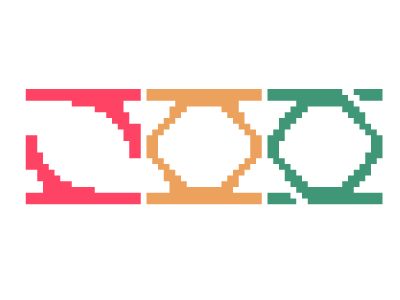

10 Obj:-0.0 Macro_Vol:0.5 Micro_Vol:[0.5, 0.5, 0.5] Macro_ch:0.1 Micro_ch:[0.04, 0.04, 0.08]
11 Obj:-0.0 Macro_Vol:0.5 Micro_Vol:[0.5, 0.5, 0.5] Macro_ch:0.1 Micro_ch:[0.04, 0.03, 0.07]
12 Obj:-0.0 Macro_Vol:0.5 Micro_Vol:[0.5, 0.5, 0.5] Macro_ch:0.1 Micro_ch:[0.05, 0.03, 0.06]
13 Obj:-0.0 Macro_Vol:0.5 Micro_Vol:[0.5, 0.5, 0.5] Macro_ch:0.1 Micro_ch:[0.07, 0.03, 0.06]
14 Obj:-0.0 Macro_Vol:0.5 Micro_Vol:[0.5, 0.5, 0.5] Macro_ch:0.1 Micro_ch:[0.11, 0.03, 0.07]


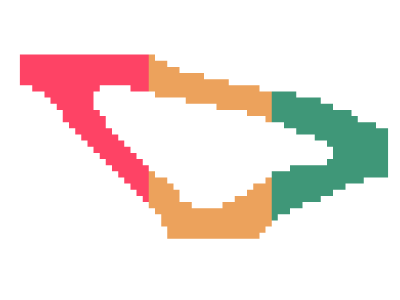

15 Obj:-0.0 Macro_Vol:0.5 Micro_Vol:[0.5, 0.5, 0.5] Macro_ch:0.1 Micro_ch:[0.16, 0.02, 0.05]
16 Obj:-0.0 Macro_Vol:0.5 Micro_Vol:[0.5, 0.5, 0.5] Macro_ch:0.1 Micro_ch:[0.2, 0.02, 0.05]
17 Obj:-0.0 Macro_Vol:0.5 Micro_Vol:[0.5, 0.5, 0.5] Macro_ch:0.1 Micro_ch:[0.2, 0.02, 0.06]
18 Obj:-0.0 Macro_Vol:0.5 Micro_Vol:[0.5, 0.5, 0.5] Macro_ch:0.09 Micro_ch:[0.2, 0.02, 0.06]
19 Obj:-0.0 Macro_Vol:0.5 Micro_Vol:[0.5, 0.5, 0.5] Macro_ch:0.09 Micro_ch:[0.12, 0.02, 0.07]


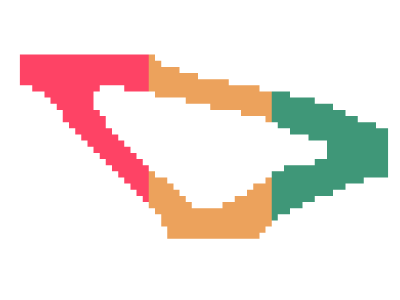

20 Obj:-0.0 Macro_Vol:0.5 Micro_Vol:[0.5, 0.5, 0.5] Macro_ch:0.1 Micro_ch:[0.06, 0.02, 0.07]
1 Obj:-0.0 Macro_Vol:0.5 Micro_Vol:[0.5, 0.5, 0.5] Macro_ch:0.1 Micro_ch:[0.12, 0.08, 0.09]
2 Obj:-0.0 Macro_Vol:0.5 Micro_Vol:[0.5, 0.5, 0.5] Macro_ch:0.1 Micro_ch:[0.17, 0.06, 0.09]
3 Obj:-0.0 Macro_Vol:0.5 Micro_Vol:[0.5, 0.5, 0.5] Macro_ch:0.1 Micro_ch:[0.2, 0.05, 0.08]
4 Obj:-0.0 Macro_Vol:0.5 Micro_Vol:[0.5, 0.5, 0.5] Macro_ch:0.1 Micro_ch:[0.2, 0.04, 0.07]


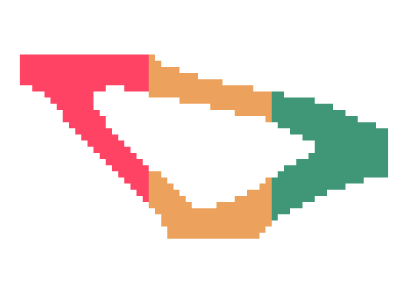

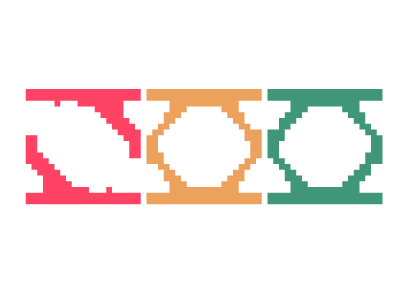

5 Obj:-0.0 Macro_Vol:0.5 Micro_Vol:[0.5, 0.5, 0.5] Macro_ch:0.1 Micro_ch:[0.2, 0.04, 0.06]
6 Obj:-0.0 Macro_Vol:0.5 Micro_Vol:[0.5, 0.5, 0.5] Macro_ch:0.1 Micro_ch:[0.05, 0.04, 0.06]
7 Obj:-0.0 Macro_Vol:0.5 Micro_Vol:[0.5, 0.5, 0.5] Macro_ch:0.09 Micro_ch:[0.04, 0.04, 0.06]
8 Obj:-0.0 Macro_Vol:0.5 Micro_Vol:[0.5, 0.5, 0.5] Macro_ch:0.1 Micro_ch:[0.04, 0.03, 0.06]
9 Obj:-0.0 Macro_Vol:0.5 Micro_Vol:[0.5, 0.5, 0.5] Macro_ch:0.1 Micro_ch:[0.04, 0.03, 0.06]


10 Obj:-0.0 Macro_Vol:0.5 Micro_Vol:[0.5, 0.5, 0.5] Macro_ch:0.1 Micro_ch:[0.04, 0.03, 0.05]
11 Obj:-0.0 Macro_Vol:0.5 Micro_Vol:[0.5, 0.5, 0.5] Macro_ch:0.07 Micro_ch:[0.04, 0.03, 0.03]
12 Obj:-0.0 Macro_Vol:0.5 Micro_Vol:[0.5, 0.5, 0.5] Macro_ch:0.08 Micro_ch:[0.04, 0.03, 0.03]
13 Obj:-0.0 Macro_Vol:0.5 Micro_Vol:[0.5, 0.5, 0.5] Macro_ch:0.09 Micro_ch:[0.04, 0.03, 0.02]
14 Obj:-0.0 Macro_Vol:0.5 Micro_Vol:[0.5, 0.5, 0.5] Macro_ch:0.1 Micro_ch:[0.04, 0.03, 0.02]


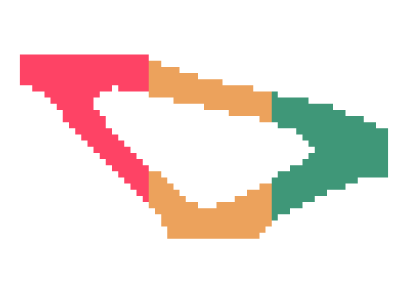

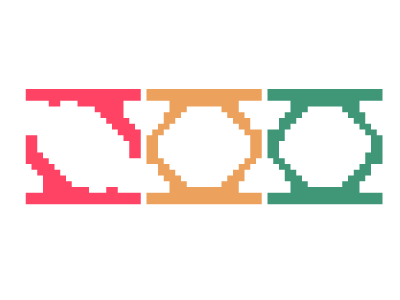

15 Obj:-0.0 Macro_Vol:0.5 Micro_Vol:[0.5, 0.5, 0.5] Macro_ch:0.09 Micro_ch:[0.05, 0.03, 0.02]
16 Obj:-0.0 Macro_Vol:0.5 Micro_Vol:[0.5, 0.5, 0.5] Macro_ch:0.1 Micro_ch:[0.05, 0.02, 0.02]
17 Obj:-0.0 Macro_Vol:0.5 Micro_Vol:[0.5, 0.5, 0.5] Macro_ch:0.07 Micro_ch:[0.05, 0.02, 0.02]
18 Obj:-0.0 Macro_Vol:0.5 Micro_Vol:[0.5, 0.5, 0.5] Macro_ch:0.08 Micro_ch:[0.05, 0.02, 0.02]
19 Obj:-0.0 Macro_Vol:0.5 Micro_Vol:[0.5, 0.5, 0.5] Macro_ch:0.08 Micro_ch:[0.05, 0.02, 0.02]


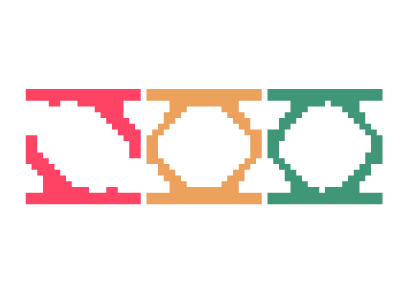

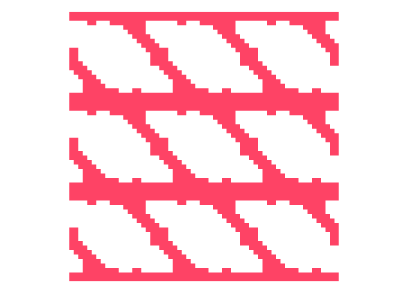

"young:[0.194, 0.055], poisson:[0.354, 0.1], shear:[0.028]"

"young:[0.212, 0.082], poisson:[0.505, 0.195], shear:[0.041]"

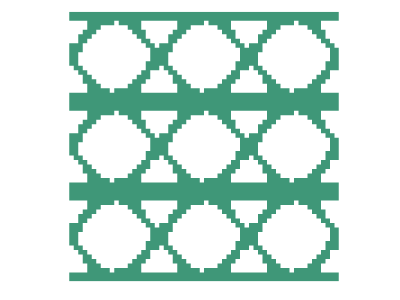

"young:[0.205, 0.087], poisson:[0.496, 0.21], shear:[0.042]"

20 Obj:-0.0 Macro_Vol:0.5 Micro_Vol:[0.5, 0.5, 0.5] Macro_ch:0.08 Micro_ch:[0.05, 0.02, 0.01]


In [17]:
Macro_anim=Animation()
Micro_anim=Animation()

Macro_struct = [6, 3, 60, 30, [0.5,0.5],5.0];
Micro_struct = [0.1, 0.1, 20, 20,0.5,2.0];
penal = 3; 
saveItr=5;
θ=3
prob=wing2D
maxloop=20

con=false

Macro_xPhys3,Micro_xPhys3,Macro_masks3,Macro_xPhys_diag3,Micro_Vol3,DHs3=CompliantMultiConTop2DU(θ,Macro_struct, Micro_struct,prob, penal,saveItr,maxloop,con);




In [257]:
include("./julia/include/_topologyOptimization.jl")


Loaded Topology Optimization Library!


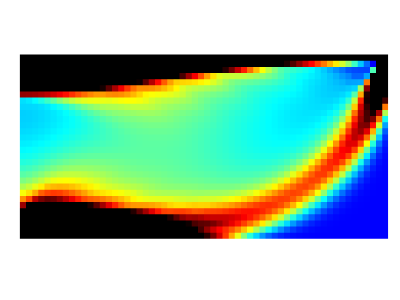

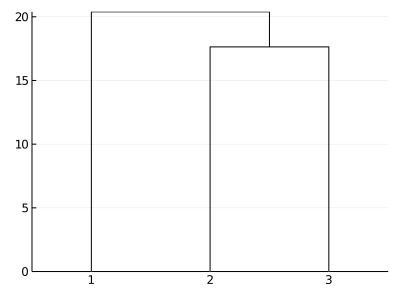

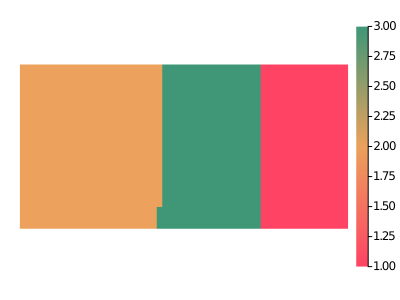

Mask 1 with density 0.5 occupies 26.67% of the macrostructure.
Mask 2 with density 0.5 occupies 43.11% of the macrostructure.
Mask 3 with density 0.5 occupies 30.22% of the macrostructure.
1 Obj:706.7062 Macro_Vol:0.5 Micro_Vol:[0.56, 0.56, 0.56] Macro_ch:0.2 Micro_ch:[0.2, 0.2, 0.2]
2 Obj:1300.9375 Macro_Vol:0.5 Micro_Vol:[0.5, 0.5, 0.5] Macro_ch:0.2 Micro_ch:[0.2, 0.2, 0.2]
3 Obj:1319.06 Macro_Vol:0.5 Micro_Vol:[0.5, 0.5, 0.5] Macro_ch:0.2 Micro_ch:[0.19, 0.2, 0.2]
4 Obj:1109.6464 Macro_Vol:0.5 Micro_Vol:[0.5, 0.5, 0.5] Macro_ch:0.2 Micro_ch:[0.11, 0.17, 0.14]


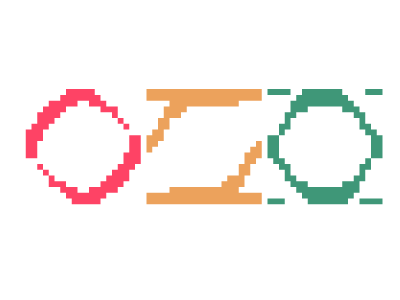

5 Obj:1013.6725 Macro_Vol:0.5 Micro_Vol:[0.5, 0.5, 0.5] Macro_ch:0.15 Micro_ch:[0.1, 0.13, 0.16]
6 Obj:944.3205 Macro_Vol:0.5 Micro_Vol:[0.5, 0.5, 0.5] Macro_ch:0.14 Micro_ch:[0.08, 0.14, 0.1]
7 Obj:887.6101 Macro_Vol:0.5 Micro_Vol:[0.5, 0.5, 0.5] Macro_ch:0.13 Micro_ch:[0.08, 0.12, 0.09]
8 Obj:840.1501 Macro_Vol:0.5 Micro_Vol:[0.5, 0.5, 0.5] Macro_ch:0.12 Micro_ch:[0.06, 0.1, 0.1]
9 Obj:801.4785 Macro_Vol:0.5 Micro_Vol:[0.5, 0.5, 0.5] Macro_ch:0.11 Micro_ch:[0.05, 0.11, 0.11]


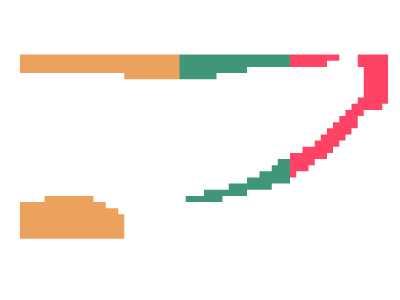

10 Obj:768.2225 Macro_Vol:0.5 Micro_Vol:[0.5, 0.5, 0.5] Macro_ch:0.1 Micro_ch:[0.05, 0.07, 0.11]
11 Obj:740.0388 Macro_Vol:0.5 Micro_Vol:[0.5, 0.5, 0.5] Macro_ch:0.1 Micro_ch:[0.05, 0.07, 0.11]
12 Obj:716.7673 Macro_Vol:0.5 Micro_Vol:[0.5, 0.5, 0.5] Macro_ch:0.1 Micro_ch:[0.05, 0.06, 0.09]
13 Obj:697.9642 Macro_Vol:0.5 Micro_Vol:[0.5, 0.5, 0.5] Macro_ch:0.11 Micro_ch:[0.04, 0.06, 0.09]
14 Obj:682.5129 Macro_Vol:0.5 Micro_Vol:[0.5, 0.5, 0.5] Macro_ch:0.12 Micro_ch:[0.04, 0.06, 0.1]


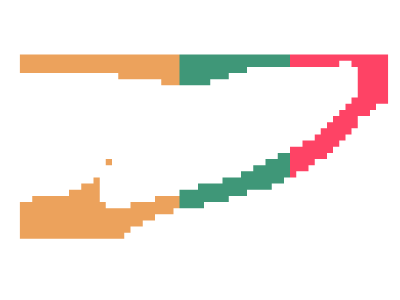

15 Obj:669.445 Macro_Vol:0.5 Micro_Vol:[0.5, 0.5, 0.5] Macro_ch:0.12 Micro_ch:[0.04, 0.06, 0.11]
16 Obj:657.9999 Macro_Vol:0.5 Micro_Vol:[0.5, 0.5, 0.5] Macro_ch:0.12 Micro_ch:[0.04, 0.05, 0.04]
17 Obj:647.9905 Macro_Vol:0.5 Micro_Vol:[0.5, 0.5, 0.5] Macro_ch:0.12 Micro_ch:[0.05, 0.06, 0.03]
18 Obj:639.1843 Macro_Vol:0.5 Micro_Vol:[0.5, 0.5, 0.5] Macro_ch:0.1 Micro_ch:[0.05, 0.06, 0.03]
19 Obj:631.5135 Macro_Vol:0.5 Micro_Vol:[0.5, 0.5, 0.5] Macro_ch:0.12 Micro_ch:[0.05, 0.06, 0.02]


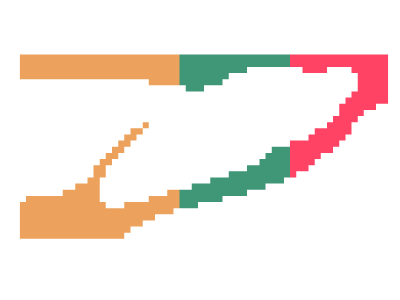

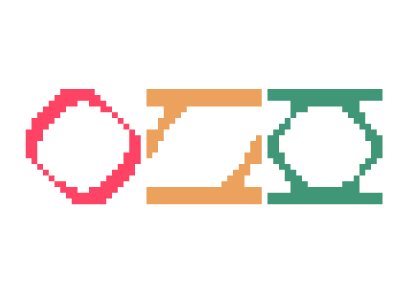

20 Obj:624.8199 Macro_Vol:0.5 Micro_Vol:[0.5, 0.5, 0.5] Macro_ch:0.1 Micro_ch:[0.05, 0.05, 0.02]
21 Obj:619.0366 Macro_Vol:0.5 Micro_Vol:[0.5, 0.5, 0.5] Macro_ch:0.11 Micro_ch:[0.04, 0.04, 0.02]
22 Obj:614.1147 Macro_Vol:0.5 Micro_Vol:[0.5, 0.5, 0.5] Macro_ch:0.11 Micro_ch:[0.03, 0.04, 0.02]
23 Obj:609.9027 Macro_Vol:0.5 Micro_Vol:[0.5, 0.5, 0.5] Macro_ch:0.1 Micro_ch:[0.03, 0.04, 0.02]
24 Obj:606.3957 Macro_Vol:0.5 Micro_Vol:[0.5, 0.5, 0.5] Macro_ch:0.09 Micro_ch:[0.03, 0.03, 0.02]


25 Obj:603.3907 Macro_Vol:0.5 Micro_Vol:[0.5, 0.5, 0.5] Macro_ch:0.1 Micro_ch:[0.04, 0.03, 0.02]
26 Obj:600.8567 Macro_Vol:0.5 Micro_Vol:[0.5, 0.5, 0.5] Macro_ch:0.08 Micro_ch:[0.04, 0.03, 0.01]
27 Obj:598.7237 Macro_Vol:0.5 Micro_Vol:[0.5, 0.5, 0.5] Macro_ch:0.09 Micro_ch:[0.04, 0.02, 0.01]
28 Obj:596.8359 Macro_Vol:0.5 Micro_Vol:[0.5, 0.5, 0.5] Macro_ch:0.08 Micro_ch:[0.04, 0.02, 0.01]
29 Obj:595.2049 Macro_Vol:0.5 Micro_Vol:[0.5, 0.5, 0.5] Macro_ch:0.09 Micro_ch:[0.04, 0.02, 0.01]


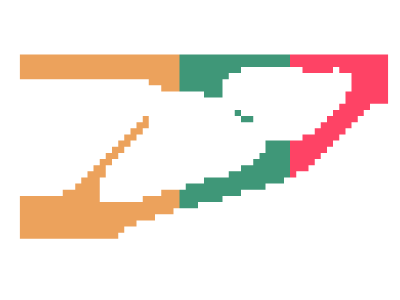

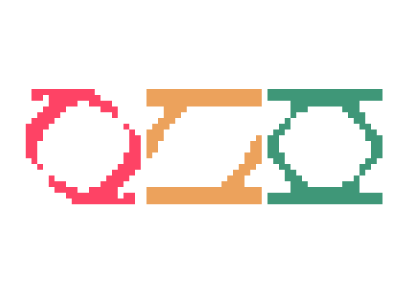

30 Obj:593.783 Macro_Vol:0.5 Micro_Vol:[0.5, 0.5, 0.5] Macro_ch:0.09 Micro_ch:[0.05, 0.02, 0.01]
31 Obj:592.5217 Macro_Vol:0.5 Micro_Vol:[0.5, 0.5, 0.5] Macro_ch:0.08 Micro_ch:[0.03, 0.02, 0.01]
32 Obj:591.4586 Macro_Vol:0.5 Micro_Vol:[0.5, 0.5, 0.5] Macro_ch:0.08 Micro_ch:[0.03, 0.02, 0.01]
33 Obj:590.5361 Macro_Vol:0.5 Micro_Vol:[0.5, 0.5, 0.5] Macro_ch:0.08 Micro_ch:[0.04, 0.02, 0.01]
34 Obj:589.7225 Macro_Vol:0.5 Micro_Vol:[0.5, 0.5, 0.5] Macro_ch:0.09 Micro_ch:[0.03, 0.02, 0.01]


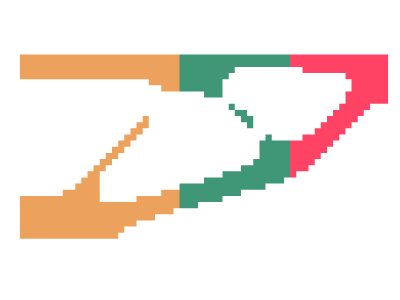

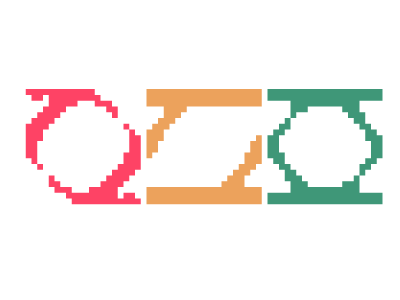

35 Obj:588.9933 Macro_Vol:0.5 Micro_Vol:[0.5, 0.5, 0.5] Macro_ch:0.08 Micro_ch:[0.03, 0.02, 0.01]
36 Obj:588.3802 Macro_Vol:0.5 Micro_Vol:[0.5, 0.5, 0.5] Macro_ch:0.08 Micro_ch:[0.03, 0.01, 0.01]
37 Obj:587.7939 Macro_Vol:0.5 Micro_Vol:[0.5, 0.5, 0.5] Macro_ch:0.06 Micro_ch:[0.03, 0.01, 0.01]
38 Obj:587.256 Macro_Vol:0.5 Micro_Vol:[0.5, 0.5, 0.5] Macro_ch:0.07 Micro_ch:[0.03, 0.01, 0.0]
39 Obj:586.7636 Macro_Vol:0.5 Micro_Vol:[0.5, 0.5, 0.5] Macro_ch:0.07 Micro_ch:[0.03, 0.01, 0.0]


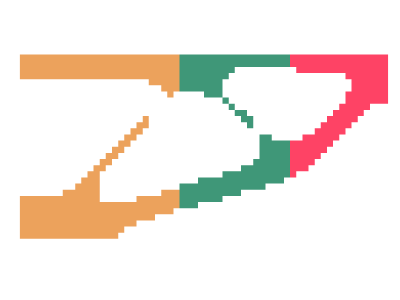

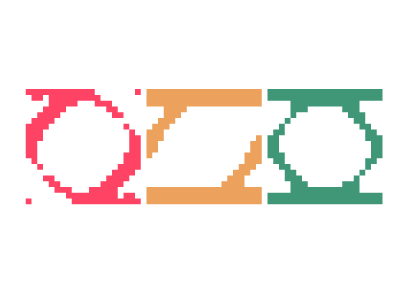

40 Obj:586.2714 Macro_Vol:0.5 Micro_Vol:[0.5, 0.5, 0.5] Macro_ch:0.06 Micro_ch:[0.04, 0.01, 0.0]
41 Obj:585.8132 Macro_Vol:0.5 Micro_Vol:[0.5, 0.5, 0.5] Macro_ch:0.06 Micro_ch:[0.03, 0.01, 0.0]
42 Obj:585.4039 Macro_Vol:0.5 Micro_Vol:[0.5, 0.5, 0.5] Macro_ch:0.07 Micro_ch:[0.03, 0.01, 0.0]
43 Obj:585.0152 Macro_Vol:0.5 Micro_Vol:[0.5, 0.5, 0.5] Macro_ch:0.05 Micro_ch:[0.03, 0.01, 0.0]
44 Obj:584.6544 Macro_Vol:0.5 Micro_Vol:[0.5, 0.5, 0.5] Macro_ch:0.05 Micro_ch:[0.03, 0.01, 0.0]


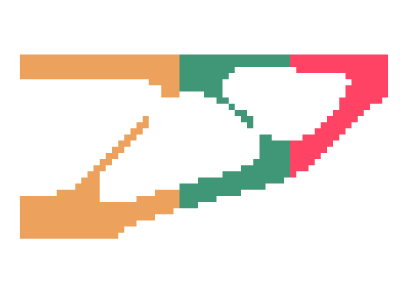

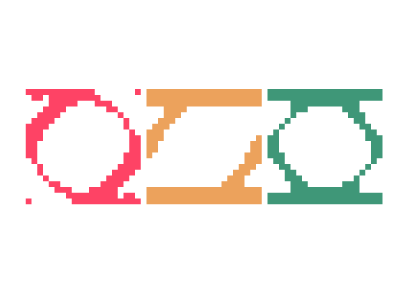

45 Obj:584.2898 Macro_Vol:0.5 Micro_Vol:[0.5, 0.5, 0.5] Macro_ch:0.06 Micro_ch:[0.03, 0.01, 0.0]
46 Obj:583.9644 Macro_Vol:0.5 Micro_Vol:[0.5, 0.5, 0.5] Macro_ch:0.06 Micro_ch:[0.03, 0.01, 0.0]
47 Obj:583.6518 Macro_Vol:0.5 Micro_Vol:[0.5, 0.5, 0.5] Macro_ch:0.07 Micro_ch:[0.03, 0.01, 0.0]
48 Obj:583.3637 Macro_Vol:0.5 Micro_Vol:[0.5, 0.5, 0.5] Macro_ch:0.05 Micro_ch:[0.03, 0.01, 0.0]
49 Obj:583.0909 Macro_Vol:0.5 Micro_Vol:[0.5, 0.5, 0.5] Macro_ch:0.05 Micro_ch:[0.03, 0.01, 0.0]


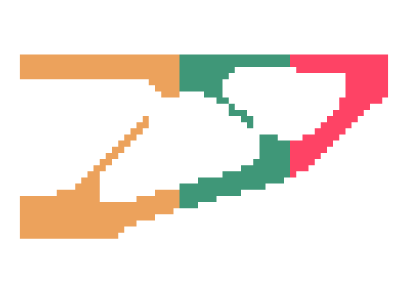

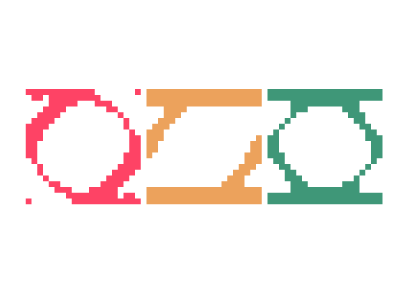

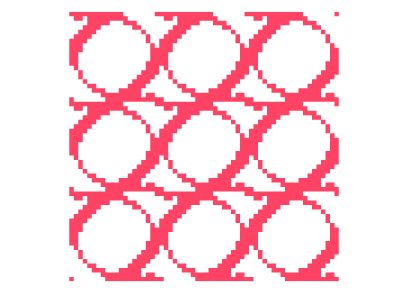

"young:[0.177, 0.146], poisson:[0.307, 0.252], shear:[0.04]"

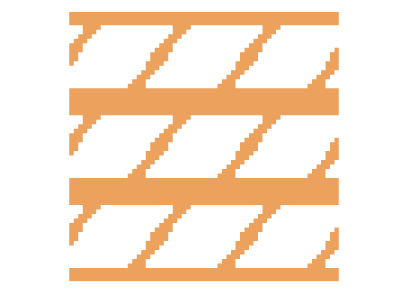

"young:[0.28, 0.08], poisson:[0.277, 0.079], shear:[0.029]"

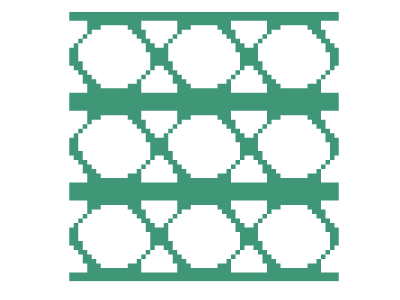

"young:[0.248, 0.092], poisson:[0.472, 0.176], shear:[0.045]"

50 Obj:582.8341 Macro_Vol:0.5 Micro_Vol:[0.5, 0.5, 0.5] Macro_ch:0.04 Micro_ch:[0.03, 0.0, 0.0]


In [213]:
#macro not mma
Macro_anim=Animation()
Micro_anim=Animation()

Macro_struct = [6, 3, 60, 30, [0.5,0.5],5.0];
Micro_struct = [0.1, 0.1, 20, 20,0.5,2.0];
penal = 3; 
saveItr=5;
θ=3
prob=MBB
maxloop=50

con=false 


Macro_xPhys3,Micro_xPhys3,Macro_masks3,Macro_xPhys_diag3,Micro_Vol3,DHs3=MultiConTop2DU(θ,Macro_struct, Micro_struct,prob, penal,saveItr,maxloop,con);


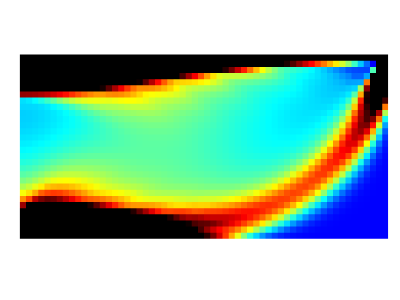

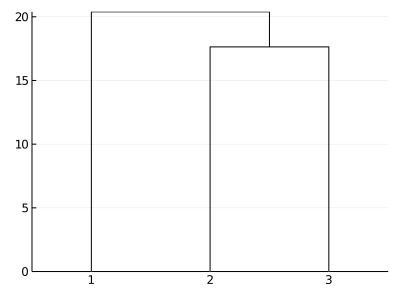

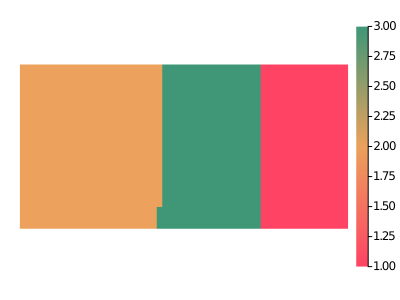

Mask 1 with density 0.5 occupies 26.67% of the macrostructure.
Mask 2 with density 0.5 occupies 43.11% of the macrostructure.
Mask 3 with density 0.5 occupies 30.22% of the macrostructure.
1 Obj:706.7062 Macro_Vol:0.55 Micro_Vol:[0.56, 0.56, 0.56] Macro_ch:0.39 Micro_ch:[0.2, 0.2, 0.2]
2 Obj:994.5043 Macro_Vol:0.56 Micro_Vol:[0.5, 0.5, 0.5] Macro_ch:0.21 Micro_ch:[0.2, 0.2, 0.2]
3 Obj:999.5555 Macro_Vol:0.56 Micro_Vol:[0.5, 0.5, 0.5] Macro_ch:0.16 Micro_ch:[0.2, 0.2, 0.2]
4 Obj:867.6242 Macro_Vol:0.56 Micro_Vol:[0.5, 0.5, 0.5] Macro_ch:0.14 Micro_ch:[0.11, 0.2, 0.14]


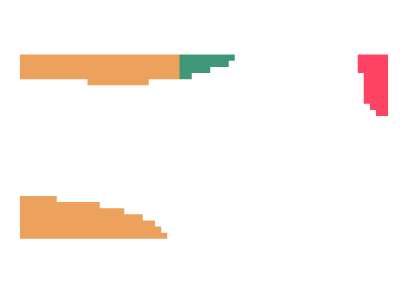

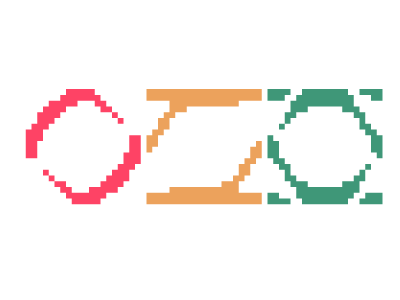

5 Obj:802.6037 Macro_Vol:0.56 Micro_Vol:[0.5, 0.5, 0.5] Macro_ch:0.11 Micro_ch:[0.1, 0.13, 0.14]
6 Obj:757.7701 Macro_Vol:0.56 Micro_Vol:[0.5, 0.5, 0.5] Macro_ch:0.1 Micro_ch:[0.09, 0.13, 0.11]
7 Obj:724.2473 Macro_Vol:0.56 Micro_Vol:[0.5, 0.5, 0.5] Macro_ch:0.09 Micro_ch:[0.08, 0.12, 0.1]
8 Obj:697.8885 Macro_Vol:0.56 Micro_Vol:[0.5, 0.5, 0.5] Macro_ch:0.09 Micro_ch:[0.06, 0.11, 0.12]
9 Obj:677.6666 Macro_Vol:0.56 Micro_Vol:[0.5, 0.5, 0.5] Macro_ch:0.08 Micro_ch:[0.06, 0.1, 0.12]


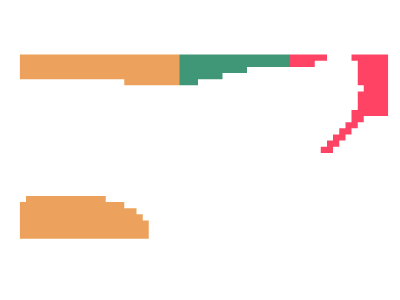

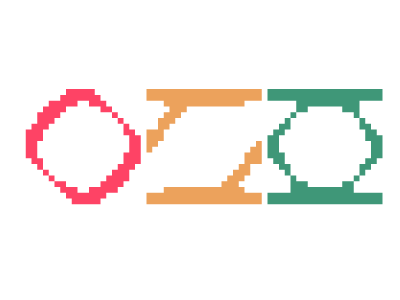

10 Obj:660.5247 Macro_Vol:0.56 Micro_Vol:[0.5, 0.5, 0.5] Macro_ch:0.08 Micro_ch:[0.05, 0.12, 0.1]
11 Obj:645.3992 Macro_Vol:0.56 Micro_Vol:[0.5, 0.5, 0.5] Macro_ch:0.07 Micro_ch:[0.04, 0.07, 0.11]
12 Obj:632.9672 Macro_Vol:0.55 Micro_Vol:[0.5, 0.5, 0.5] Macro_ch:0.07 Micro_ch:[0.04, 0.08, 0.09]
13 Obj:622.6779 Macro_Vol:0.55 Micro_Vol:[0.5, 0.5, 0.5] Macro_ch:0.07 Micro_ch:[0.04, 0.05, 0.07]
14 Obj:613.8691 Macro_Vol:0.55 Micro_Vol:[0.5, 0.5, 0.5] Macro_ch:0.07 Micro_ch:[0.03, 0.06, 0.08]


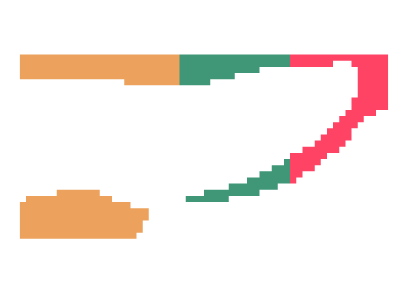

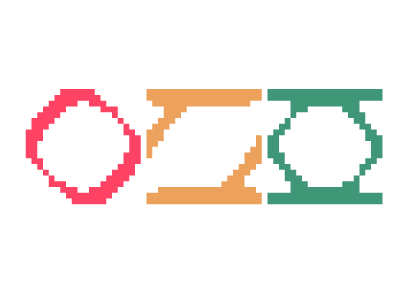

15 Obj:606.1195 Macro_Vol:0.55 Micro_Vol:[0.5, 0.5, 0.5] Macro_ch:0.07 Micro_ch:[0.03, 0.06, 0.07]
16 Obj:599.167 Macro_Vol:0.55 Micro_Vol:[0.5, 0.5, 0.5] Macro_ch:0.06 Micro_ch:[0.03, 0.05, 0.04]
17 Obj:592.8149 Macro_Vol:0.55 Micro_Vol:[0.5, 0.5, 0.5] Macro_ch:0.06 Micro_ch:[0.03, 0.05, 0.04]
18 Obj:587.0671 Macro_Vol:0.55 Micro_Vol:[0.5, 0.5, 0.5] Macro_ch:0.06 Micro_ch:[0.03, 0.05, 0.03]
19 Obj:581.7967 Macro_Vol:0.55 Micro_Vol:[0.5, 0.5, 0.5] Macro_ch:0.06 Micro_ch:[0.04, 0.05, 0.03]


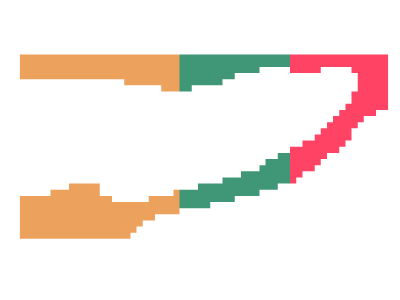

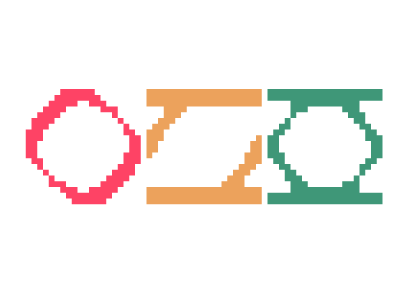

20 Obj:576.9549 Macro_Vol:0.55 Micro_Vol:[0.5, 0.5, 0.5] Macro_ch:0.05 Micro_ch:[0.04, 0.05, 0.02]
21 Obj:572.5297 Macro_Vol:0.55 Micro_Vol:[0.5, 0.5, 0.5] Macro_ch:0.05 Micro_ch:[0.04, 0.04, 0.02]
22 Obj:568.4642 Macro_Vol:0.55 Micro_Vol:[0.5, 0.5, 0.5] Macro_ch:0.05 Micro_ch:[0.03, 0.03, 0.02]
23 Obj:564.6646 Macro_Vol:0.55 Micro_Vol:[0.5, 0.5, 0.5] Macro_ch:0.05 Micro_ch:[0.03, 0.03, 0.02]
24 Obj:561.0261 Macro_Vol:0.55 Micro_Vol:[0.5, 0.5, 0.5] Macro_ch:0.04 Micro_ch:[0.03, 0.03, 0.02]


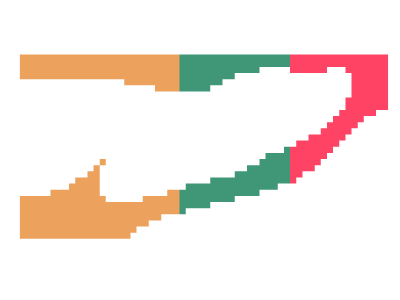

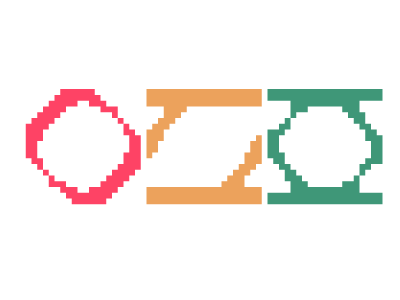

25 Obj:557.5578 Macro_Vol:0.55 Micro_Vol:[0.5, 0.5, 0.5] Macro_ch:0.04 Micro_ch:[0.03, 0.02, 0.02]
26 Obj:554.293 Macro_Vol:0.55 Micro_Vol:[0.5, 0.5, 0.5] Macro_ch:0.04 Micro_ch:[0.03, 0.02, 0.02]
27 Obj:551.2711 Macro_Vol:0.55 Micro_Vol:[0.5, 0.5, 0.5] Macro_ch:0.04 Micro_ch:[0.03, 0.02, 0.01]
28 Obj:548.5144 Macro_Vol:0.54 Micro_Vol:[0.5, 0.5, 0.5] Macro_ch:0.04 Micro_ch:[0.03, 0.02, 0.01]
29 Obj:545.9772 Macro_Vol:0.54 Micro_Vol:[0.5, 0.5, 0.5] Macro_ch:0.04 Micro_ch:[0.03, 0.02, 0.01]


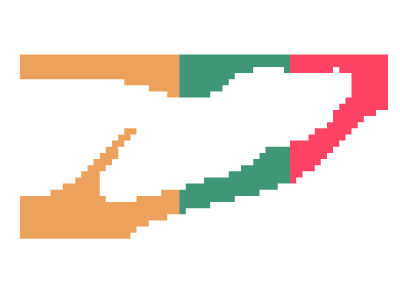

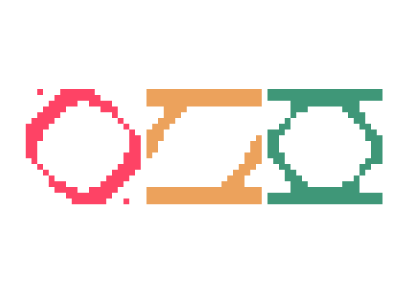

30 Obj:543.6654 Macro_Vol:0.54 Micro_Vol:[0.5, 0.5, 0.5] Macro_ch:0.04 Micro_ch:[0.04, 0.02, 0.01]
31 Obj:541.5806 Macro_Vol:0.54 Micro_Vol:[0.5, 0.5, 0.5] Macro_ch:0.04 Micro_ch:[0.04, 0.02, 0.01]
32 Obj:539.6918 Macro_Vol:0.54 Micro_Vol:[0.5, 0.5, 0.5] Macro_ch:0.04 Micro_ch:[0.04, 0.02, 0.01]
33 Obj:538.006 Macro_Vol:0.54 Micro_Vol:[0.5, 0.5, 0.5] Macro_ch:0.04 Micro_ch:[0.04, 0.02, 0.01]
34 Obj:536.4746 Macro_Vol:0.54 Micro_Vol:[0.5, 0.5, 0.5] Macro_ch:0.03 Micro_ch:[0.04, 0.01, 0.01]


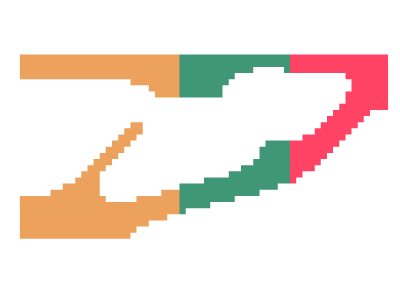

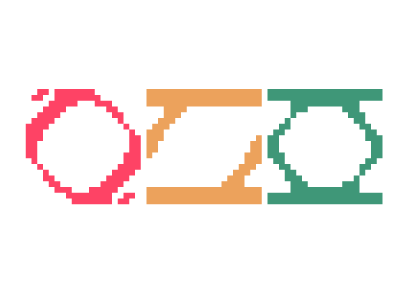

35 Obj:535.1049 Macro_Vol:0.54 Micro_Vol:[0.5, 0.5, 0.5] Macro_ch:0.03 Micro_ch:[0.04, 0.01, 0.01]
36 Obj:533.8646 Macro_Vol:0.54 Micro_Vol:[0.5, 0.5, 0.5] Macro_ch:0.03 Micro_ch:[0.04, 0.01, 0.01]
37 Obj:532.7219 Macro_Vol:0.54 Micro_Vol:[0.5, 0.5, 0.5] Macro_ch:0.03 Micro_ch:[0.04, 0.01, 0.01]
38 Obj:531.6864 Macro_Vol:0.54 Micro_Vol:[0.5, 0.5, 0.5] Macro_ch:0.03 Micro_ch:[0.04, 0.01, 0.01]
39 Obj:530.7601 Macro_Vol:0.54 Micro_Vol:[0.5, 0.5, 0.5] Macro_ch:0.03 Micro_ch:[0.04, 0.01, 0.01]


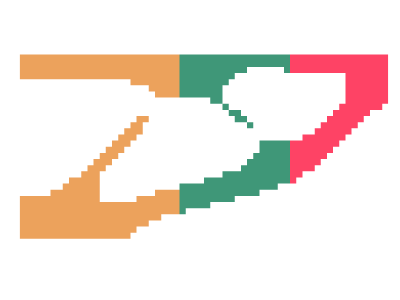

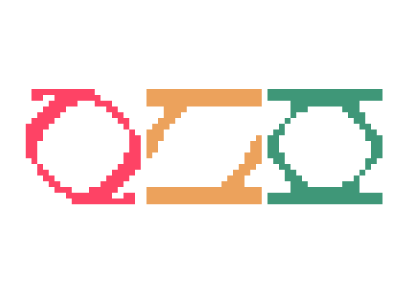

40 Obj:529.8995 Macro_Vol:0.54 Micro_Vol:[0.5, 0.5, 0.5] Macro_ch:0.03 Micro_ch:[0.03, 0.01, 0.01]
41 Obj:529.1197 Macro_Vol:0.54 Micro_Vol:[0.5, 0.5, 0.5] Macro_ch:0.03 Micro_ch:[0.03, 0.01, 0.01]
42 Obj:528.407 Macro_Vol:0.54 Micro_Vol:[0.5, 0.5, 0.5] Macro_ch:0.03 Micro_ch:[0.03, 0.01, 0.0]
43 Obj:527.7553 Macro_Vol:0.54 Micro_Vol:[0.5, 0.5, 0.5] Macro_ch:0.03 Micro_ch:[0.03, 0.01, 0.0]
44 Obj:527.1553 Macro_Vol:0.54 Micro_Vol:[0.5, 0.5, 0.5] Macro_ch:0.03 Micro_ch:[0.03, 0.01, 0.0]


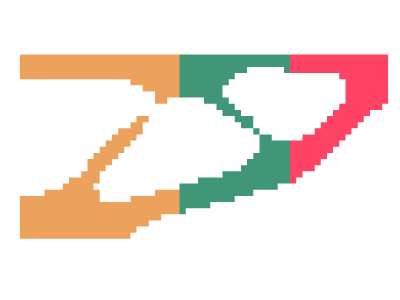

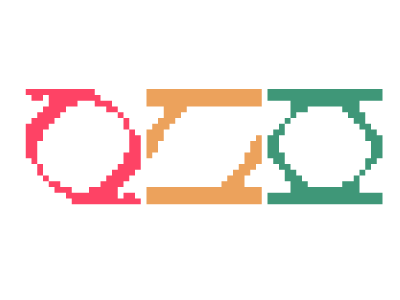

45 Obj:526.612 Macro_Vol:0.54 Micro_Vol:[0.5, 0.5, 0.5] Macro_ch:0.03 Micro_ch:[0.03, 0.01, 0.0]
46 Obj:526.1152 Macro_Vol:0.54 Micro_Vol:[0.5, 0.5, 0.5] Macro_ch:0.03 Micro_ch:[0.03, 0.01, 0.0]
47 Obj:525.653 Macro_Vol:0.54 Micro_Vol:[0.5, 0.5, 0.5] Macro_ch:0.02 Micro_ch:[0.02, 0.01, 0.0]
48 Obj:525.2229 Macro_Vol:0.54 Micro_Vol:[0.5, 0.5, 0.5] Macro_ch:0.02 Micro_ch:[0.02, 0.01, 0.0]
49 Obj:524.8315 Macro_Vol:0.54 Micro_Vol:[0.5, 0.5, 0.5] Macro_ch:0.02 Micro_ch:[0.02, 0.0, 0.0]


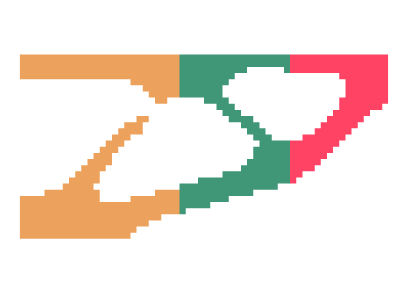

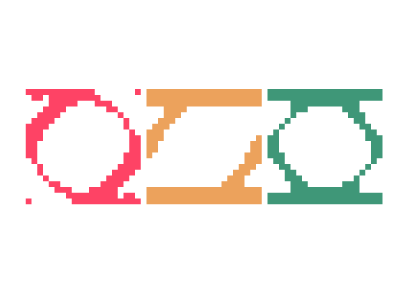

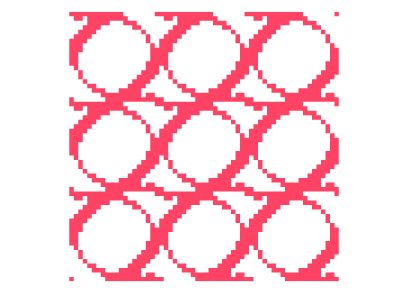

"young:[0.174, 0.151], poisson:[0.297, 0.257], shear:[0.04]"

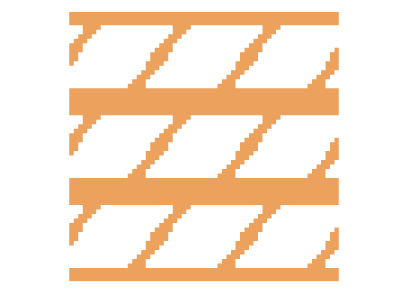

"young:[0.28, 0.08], poisson:[0.277, 0.079], shear:[0.029]"

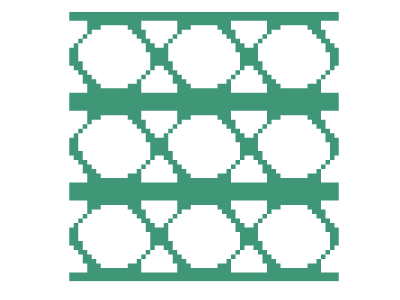

"young:[0.247, 0.092], poisson:[0.477, 0.178], shear:[0.045]"

50 Obj:524.4698 Macro_Vol:0.54 Micro_Vol:[0.5, 0.5, 0.5] Macro_ch:0.02 Micro_ch:[0.02, 0.0, 0.0]


In [215]:
#macro mma
Macro_anim=Animation()
Micro_anim=Animation()

Macro_struct = [6, 3, 60, 30, [0.5,0.5],5.0];
Micro_struct = [0.1, 0.1, 20, 20,0.5,2.0];
penal = 3; 
saveItr=5;
θ=3
prob=MBB
maxloop=50

con=false 


Macro_xPhys3,Micro_xPhys3,Macro_masks3,Macro_xPhys_diag3,Micro_Vol3,DHs3=MultiConTop2DU(θ,Macro_struct, Micro_struct,prob, penal,saveItr,maxloop,con);


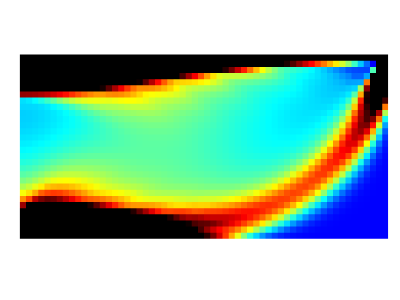

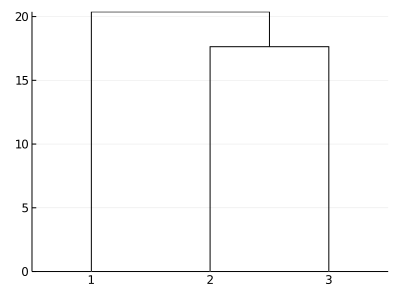

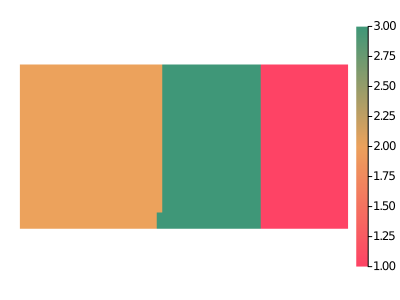

Mask 1 with density 0.5 occupies 26.67% of the macrostructure.
Mask 2 with density 0.5 occupies 43.17% of the macrostructure.
Mask 3 with density 0.5 occupies 30.17% of the macrostructure.
1 Obj:706.7062 Macro_Vol:0.55 Micro_Vol:[0.47, 0.52, 0.46] Macro_ch:0.39 Micro_ch:[0.4, 0.39, 0.42]
2 Obj:1380.0919 Macro_Vol:0.56 Micro_Vol:[0.54, 0.54, 0.54] Macro_ch:0.21 Micro_ch:[0.19, 0.13, 0.2]
3 Obj:813.5145 Macro_Vol:0.56 Micro_Vol:[0.54, 0.54, 0.54] Macro_ch:0.16 Micro_ch:[0.08, 0.12, 0.09]
4 Obj:725.0903 Macro_Vol:0.56 Micro_Vol:[0.54, 0.54, 0.54] Macro_ch:0.13 Micro_ch:[0.08, 0.08, 0.08]


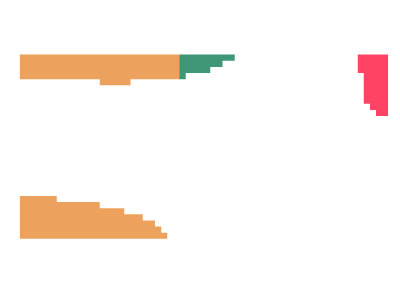

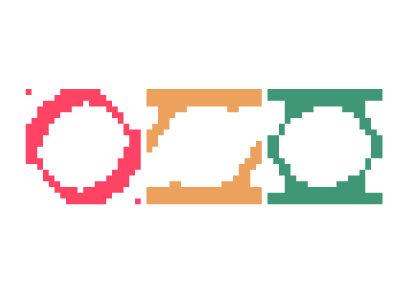

5 Obj:678.8932 Macro_Vol:0.56 Micro_Vol:[0.54, 0.54, 0.54] Macro_ch:0.12 Micro_ch:[0.07, 0.06, 0.07]
6 Obj:650.1155 Macro_Vol:0.56 Micro_Vol:[0.54, 0.54, 0.54] Macro_ch:0.11 Micro_ch:[0.06, 0.06, 0.06]
7 Obj:629.4469 Macro_Vol:0.56 Micro_Vol:[0.54, 0.54, 0.54] Macro_ch:0.1 Micro_ch:[0.05, 0.05, 0.05]
8 Obj:613.5019 Macro_Vol:0.56 Micro_Vol:[0.54, 0.53, 0.54] Macro_ch:0.09 Micro_ch:[0.04, 0.05, 0.05]
9 Obj:600.4884 Macro_Vol:0.56 Micro_Vol:[0.54, 0.53, 0.54] Macro_ch:0.08 Micro_ch:[0.03, 0.05, 0.04]


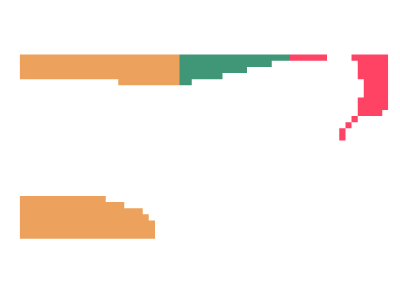

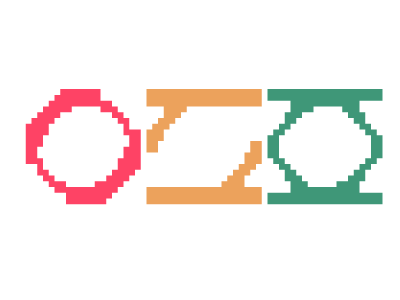

10 Obj:589.5261 Macro_Vol:0.56 Micro_Vol:[0.54, 0.53, 0.54] Macro_ch:0.08 Micro_ch:[0.03, 0.04, 0.04]
11 Obj:579.8074 Macro_Vol:0.56 Micro_Vol:[0.54, 0.53, 0.54] Macro_ch:0.08 Micro_ch:[0.03, 0.04, 0.04]
12 Obj:570.6745 Macro_Vol:0.55 Micro_Vol:[0.54, 0.53, 0.54] Macro_ch:0.07 Micro_ch:[0.03, 0.04, 0.04]
13 Obj:562.02 Macro_Vol:0.55 Micro_Vol:[0.54, 0.53, 0.53] Macro_ch:0.07 Micro_ch:[0.03, 0.04, 0.04]
14 Obj:554.1293 Macro_Vol:0.55 Micro_Vol:[0.54, 0.53, 0.53] Macro_ch:0.07 Micro_ch:[0.02, 0.03, 0.04]


15 Obj:547.0864 Macro_Vol:0.55 Micro_Vol:[0.54, 0.53, 0.53] Macro_ch:0.07 Micro_ch:[0.02, 0.04, 0.03]
16 Obj:540.8297 Macro_Vol:0.55 Micro_Vol:[0.54, 0.53, 0.53] Macro_ch:0.06 Micro_ch:[0.02, 0.04, 0.03]
17 Obj:535.111 Macro_Vol:0.55 Micro_Vol:[0.54, 0.53, 0.53] Macro_ch:0.06 Micro_ch:[0.02, 0.04, 0.03]
18 Obj:529.858 Macro_Vol:0.55 Micro_Vol:[0.54, 0.53, 0.53] Macro_ch:0.06 Micro_ch:[0.02, 0.04, 0.02]
19 Obj:524.9899 Macro_Vol:0.55 Micro_Vol:[0.54, 0.53, 0.53] Macro_ch:0.06 Micro_ch:[0.02, 0.03, 0.02]


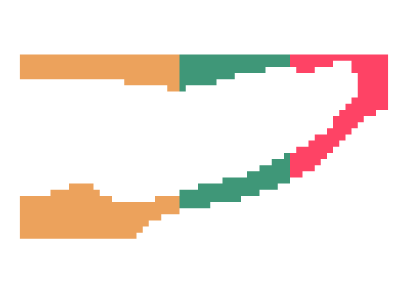

20 Obj:520.4952 Macro_Vol:0.55 Micro_Vol:[0.54, 0.53, 0.53] Macro_ch:0.05 Micro_ch:[0.02, 0.03, 0.02]
21 Obj:516.4045 Macro_Vol:0.55 Micro_Vol:[0.54, 0.53, 0.53] Macro_ch:0.05 Micro_ch:[0.02, 0.03, 0.02]
22 Obj:512.5924 Macro_Vol:0.55 Micro_Vol:[0.54, 0.53, 0.53] Macro_ch:0.05 Micro_ch:[0.02, 0.02, 0.02]
23 Obj:509.0087 Macro_Vol:0.55 Micro_Vol:[0.54, 0.53, 0.53] Macro_ch:0.05 Micro_ch:[0.02, 0.02, 0.02]
24 Obj:505.6262 Macro_Vol:0.55 Micro_Vol:[0.54, 0.53, 0.53] Macro_ch:0.04 Micro_ch:[0.02, 0.02, 0.01]


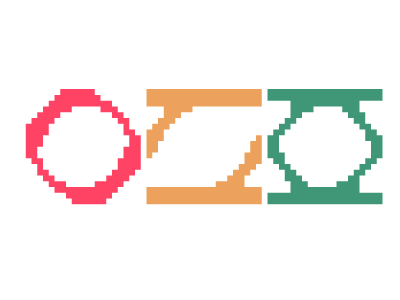

25 Obj:502.4211 Macro_Vol:0.55 Micro_Vol:[0.54, 0.53, 0.53] Macro_ch:0.04 Micro_ch:[0.02, 0.02, 0.01]
26 Obj:499.3793 Macro_Vol:0.55 Micro_Vol:[0.54, 0.53, 0.53] Macro_ch:0.04 Micro_ch:[0.02, 0.02, 0.01]
27 Obj:496.4894 Macro_Vol:0.55 Micro_Vol:[0.54, 0.53, 0.53] Macro_ch:0.04 Micro_ch:[0.02, 0.02, 0.01]
28 Obj:493.7947 Macro_Vol:0.55 Micro_Vol:[0.54, 0.53, 0.53] Macro_ch:0.04 Micro_ch:[0.02, 0.02, 0.01]
29 Obj:491.3048 Macro_Vol:0.55 Micro_Vol:[0.54, 0.53, 0.53] Macro_ch:0.04 Micro_ch:[0.02, 0.02, 0.01]


30 Obj:489.0101 Macro_Vol:0.54 Micro_Vol:[0.54, 0.53, 0.53] Macro_ch:0.04 Micro_ch:[0.02, 0.01, 0.01]
31 Obj:486.8938 Macro_Vol:0.54 Micro_Vol:[0.54, 0.53, 0.53] Macro_ch:0.04 Micro_ch:[0.02, 0.01, 0.01]
32 Obj:484.966 Macro_Vol:0.54 Micro_Vol:[0.54, 0.53, 0.53] Macro_ch:0.04 Micro_ch:[0.02, 0.01, 0.01]
33 Obj:483.195 Macro_Vol:0.54 Micro_Vol:[0.54, 0.53, 0.53] Macro_ch:0.04 Micro_ch:[0.02, 0.01, 0.01]
34 Obj:481.5858 Macro_Vol:0.54 Micro_Vol:[0.54, 0.53, 0.53] Macro_ch:0.04 Micro_ch:[0.02, 0.01, 0.01]


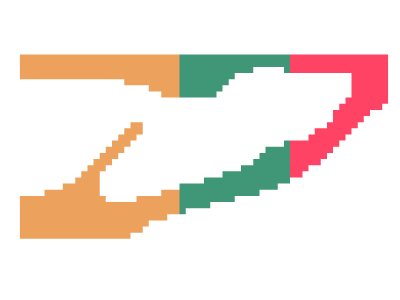

35 Obj:480.1209 Macro_Vol:0.54 Micro_Vol:[0.54, 0.53, 0.53] Macro_ch:0.04 Micro_ch:[0.02, 0.01, 0.01]
36 Obj:478.8059 Macro_Vol:0.54 Micro_Vol:[0.54, 0.53, 0.53] Macro_ch:0.03 Micro_ch:[0.02, 0.01, 0.01]


LoadError: [91mInterruptException:[39m

In [237]:
#macro mma
#micro mma
Macro_anim=Animation()
Micro_anim=Animation()

Macro_struct = [6, 3, 60, 30, [0.5,0.5],5.0];
Micro_struct = [0.1, 0.1, 20, 20,0.5,2.0];
penal = 3; 
saveItr=5;
θ=3
prob=MBB
maxloop=50

con=false 


Macro_xPhys3,Micro_xPhys3,Macro_masks3,Macro_xPhys_diag3,Micro_Vol3,DHs3=MultiConTop2DU(θ,Macro_struct, Micro_struct,prob, penal,saveItr,maxloop,con);


---

# Connectivity

In [332]:
include("./julia/include/_topologyOptimization.jl")


Loaded Topology Optimization Library!


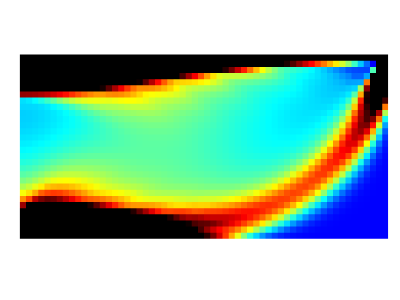

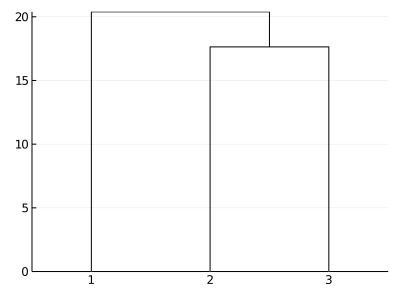

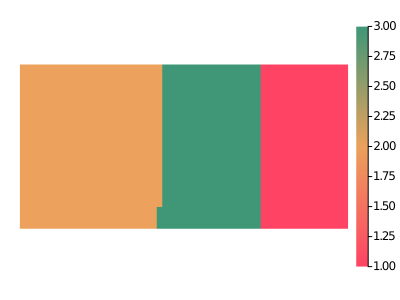

Mask 1 with density 0.5 occupies 26.67% of the macrostructure.
Mask 2 with density 0.5 occupies 43.11% of the macrostructure.
Mask 3 with density 0.5 occupies 30.22% of the macrostructure.
1 Obj:1321.8874 Macro_Vol:0.54 Micro_Vol:[0.5, 0.5, 0.5] Macro_ch:0.39 Micro_ch:[0.02, 0.02, 0.02]
2 Obj:2978.6344 Macro_Vol:0.56 Micro_Vol:[0.5, 0.5, 0.5] Macro_ch:0.21 Micro_ch:[0.2, 0.2, 0.2]
3 Obj:1478.9005 Macro_Vol:0.56 Micro_Vol:[0.5, 0.5, 0.5] Macro_ch:0.16 Micro_ch:[0.2, 0.2, 0.2]
4 Obj:1028.7882 Macro_Vol:0.56 Micro_Vol:[0.5, 0.5, 0.5] Macro_ch:0.14 Micro_ch:[0.2, 0.2, 0.2]


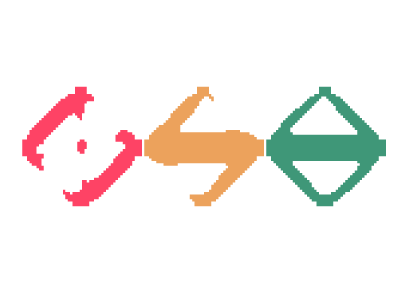

5 Obj:831.6839 Macro_Vol:0.56 Micro_Vol:[0.5, 0.5, 0.5] Macro_ch:0.12 Micro_ch:[0.2, 0.2, 0.2]
6 Obj:758.1717 Macro_Vol:0.56 Micro_Vol:[0.5, 0.5, 0.5] Macro_ch:0.11 Micro_ch:[0.2, 0.2, 0.2]
7 Obj:720.8628 Macro_Vol:0.56 Micro_Vol:[0.5, 0.5, 0.5] Macro_ch:0.1 Micro_ch:[0.2, 0.2, 0.2]
8 Obj:696.9561 Macro_Vol:0.56 Micro_Vol:[0.5, 0.5, 0.5] Macro_ch:0.09 Micro_ch:[0.2, 0.2, 0.2]
9 Obj:679.7232 Macro_Vol:0.56 Micro_Vol:[0.5, 0.5, 0.5] Macro_ch:0.09 Micro_ch:[0.2, 0.2, 0.2]


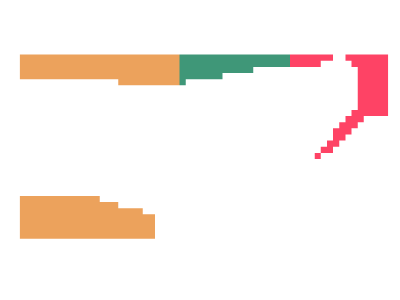

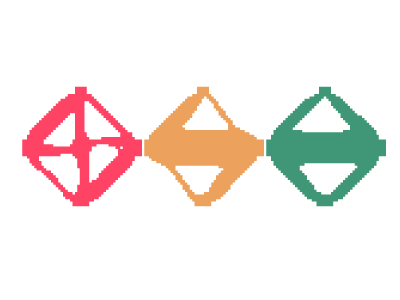

10 Obj:666.2539 Macro_Vol:0.56 Micro_Vol:[0.5, 0.5, 0.5] Macro_ch:0.08 Micro_ch:[0.2, 0.2, 0.2]
11 Obj:654.8142 Macro_Vol:0.56 Micro_Vol:[0.5, 0.5, 0.5] Macro_ch:0.08 Micro_ch:[0.2, 0.2, 0.2]
12 Obj:645.0993 Macro_Vol:0.55 Micro_Vol:[0.5, 0.5, 0.5] Macro_ch:0.08 Micro_ch:[0.2, 0.2, 0.2]
13 Obj:636.2798 Macro_Vol:0.55 Micro_Vol:[0.5, 0.5, 0.5] Macro_ch:0.07 Micro_ch:[0.18, 0.2, 0.2]
14 Obj:628.307 Macro_Vol:0.55 Micro_Vol:[0.5, 0.5, 0.5] Macro_ch:0.07 Micro_ch:[0.16, 0.2, 0.2]


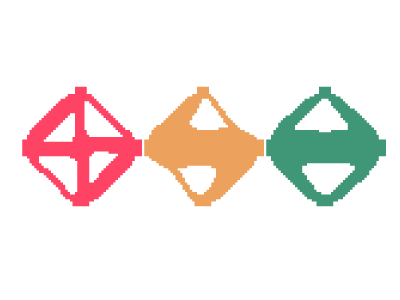

15 Obj:621.2477 Macro_Vol:0.55 Micro_Vol:[0.5, 0.5, 0.5] Macro_ch:0.07 Micro_ch:[0.16, 0.2, 0.2]
16 Obj:614.8049 Macro_Vol:0.55 Micro_Vol:[0.5, 0.5, 0.5] Macro_ch:0.06 Micro_ch:[0.17, 0.2, 0.2]
17 Obj:608.7378 Macro_Vol:0.55 Micro_Vol:[0.5, 0.5, 0.5] Macro_ch:0.06 Micro_ch:[0.13, 0.2, 0.2]
18 Obj:603.1454 Macro_Vol:0.55 Micro_Vol:[0.5, 0.5, 0.5] Macro_ch:0.06 Micro_ch:[0.16, 0.2, 0.2]
19 Obj:598.1572 Macro_Vol:0.55 Micro_Vol:[0.5, 0.5, 0.5] Macro_ch:0.05 Micro_ch:[0.14, 0.2, 0.2]


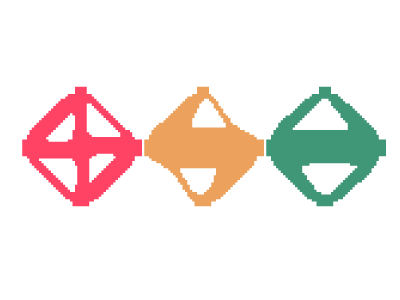

20 Obj:593.768 Macro_Vol:0.55 Micro_Vol:[0.5, 0.5, 0.5] Macro_ch:0.05 Micro_ch:[0.18, 0.2, 0.2]
21 Obj:589.6943 Macro_Vol:0.55 Micro_Vol:[0.5, 0.5, 0.5] Macro_ch:0.05 Micro_ch:[0.18, 0.2, 0.2]
22 Obj:585.8376 Macro_Vol:0.55 Micro_Vol:[0.5, 0.5, 0.5] Macro_ch:0.05 Micro_ch:[0.2, 0.2, 0.2]
23 Obj:582.0956 Macro_Vol:0.55 Micro_Vol:[0.5, 0.5, 0.5] Macro_ch:0.05 Micro_ch:[0.16, 0.2, 0.2]
24 Obj:578.6603 Macro_Vol:0.55 Micro_Vol:[0.5, 0.5, 0.5] Macro_ch:0.04 Micro_ch:[0.15, 0.2, 0.2]


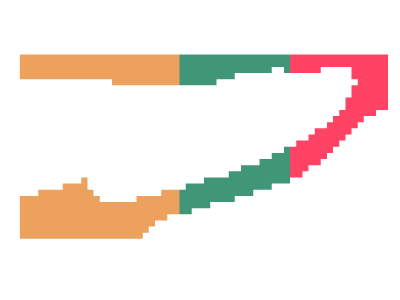

25 Obj:575.5459 Macro_Vol:0.55 Micro_Vol:[0.5, 0.5, 0.5] Macro_ch:0.04 Micro_ch:[0.14, 0.2, 0.2]
26 Obj:572.6795 Macro_Vol:0.55 Micro_Vol:[0.5, 0.5, 0.5] Macro_ch:0.04 Micro_ch:[0.1, 0.2, 0.2]
27 Obj:570.0316 Macro_Vol:0.55 Micro_Vol:[0.5, 0.5, 0.5] Macro_ch:0.04 Micro_ch:[0.1, 0.2, 0.2]
28 Obj:567.5429 Macro_Vol:0.55 Micro_Vol:[0.5, 0.5, 0.5] Macro_ch:0.04 Micro_ch:[0.12, 0.2, 0.2]
29 Obj:565.2111 Macro_Vol:0.55 Micro_Vol:[0.5, 0.5, 0.5] Macro_ch:0.04 Micro_ch:[0.12, 0.2, 0.2]


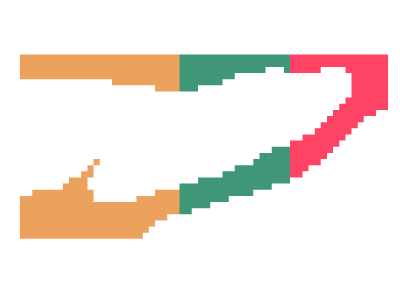

30 Obj:563.0935 Macro_Vol:0.55 Micro_Vol:[0.5, 0.5, 0.5] Macro_ch:0.04 Micro_ch:[0.12, 0.2, 0.2]
31 Obj:561.1752 Macro_Vol:0.54 Micro_Vol:[0.5, 0.5, 0.5] Macro_ch:0.04 Micro_ch:[0.12, 0.2, 0.2]
32 Obj:559.4419 Macro_Vol:0.54 Micro_Vol:[0.5, 0.5, 0.5] Macro_ch:0.04 Micro_ch:[0.12, 0.2, 0.2]
33 Obj:557.8816 Macro_Vol:0.54 Micro_Vol:[0.5, 0.5, 0.5] Macro_ch:0.04 Micro_ch:[0.12, 0.2, 0.2]
34 Obj:556.4774 Macro_Vol:0.54 Micro_Vol:[0.5, 0.5, 0.5] Macro_ch:0.03 Micro_ch:[0.11, 0.2, 0.2]


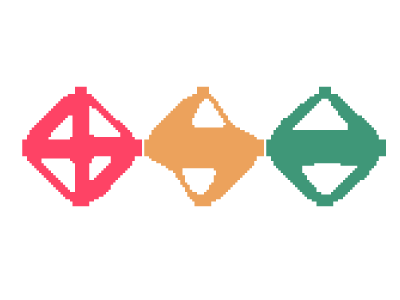

35 Obj:555.1994 Macro_Vol:0.54 Micro_Vol:[0.5, 0.5, 0.5] Macro_ch:0.03 Micro_ch:[0.12, 0.2, 0.2]
36 Obj:554.0085 Macro_Vol:0.54 Micro_Vol:[0.5, 0.5, 0.5] Macro_ch:0.03 Micro_ch:[0.11, 0.2, 0.2]
37 Obj:552.9269 Macro_Vol:0.54 Micro_Vol:[0.5, 0.5, 0.5] Macro_ch:0.03 Micro_ch:[0.12, 0.2, 0.2]
38 Obj:551.9502 Macro_Vol:0.54 Micro_Vol:[0.5, 0.5, 0.5] Macro_ch:0.03 Micro_ch:[0.12, 0.2, 0.2]
39 Obj:551.0497 Macro_Vol:0.54 Micro_Vol:[0.5, 0.5, 0.5] Macro_ch:0.03 Micro_ch:[0.13, 0.2, 0.2]


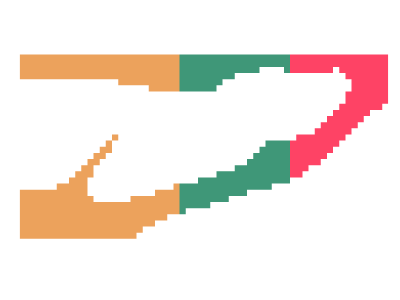

40 Obj:550.2191 Macro_Vol:0.54 Micro_Vol:[0.5, 0.5, 0.5] Macro_ch:0.03 Micro_ch:[0.13, 0.2, 0.2]
41 Obj:549.454 Macro_Vol:0.54 Micro_Vol:[0.5, 0.5, 0.5] Macro_ch:0.03 Micro_ch:[0.13, 0.2, 0.2]
42 Obj:548.7467 Macro_Vol:0.54 Micro_Vol:[0.5, 0.5, 0.5] Macro_ch:0.03 Micro_ch:[0.12, 0.2, 0.2]
43 Obj:548.0929 Macro_Vol:0.54 Micro_Vol:[0.5, 0.5, 0.5] Macro_ch:0.03 Micro_ch:[0.11, 0.2, 0.2]
44 Obj:547.4944 Macro_Vol:0.54 Micro_Vol:[0.5, 0.5, 0.5] Macro_ch:0.03 Micro_ch:[0.11, 0.2, 0.2]


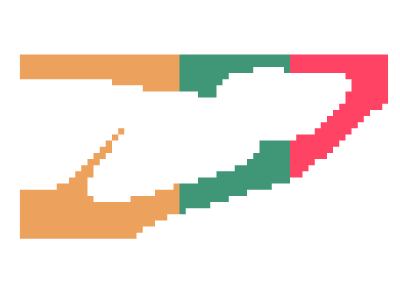

45 Obj:546.9622 Macro_Vol:0.54 Micro_Vol:[0.5, 0.5, 0.5] Macro_ch:0.03 Micro_ch:[0.12, 0.2, 0.2]
46 Obj:546.4823 Macro_Vol:0.54 Micro_Vol:[0.5, 0.5, 0.5] Macro_ch:0.03 Micro_ch:[0.08, 0.2, 0.2]
47 Obj:546.0448 Macro_Vol:0.54 Micro_Vol:[0.5, 0.5, 0.5] Macro_ch:0.02 Micro_ch:[0.07, 0.2, 0.2]
48 Obj:545.639 Macro_Vol:0.54 Micro_Vol:[0.5, 0.5, 0.5] Macro_ch:0.02 Micro_ch:[0.07, 0.2, 0.2]
49 Obj:545.2718 Macro_Vol:0.54 Micro_Vol:[0.5, 0.5, 0.5] Macro_ch:0.02 Micro_ch:[0.05, 0.2, 0.2]


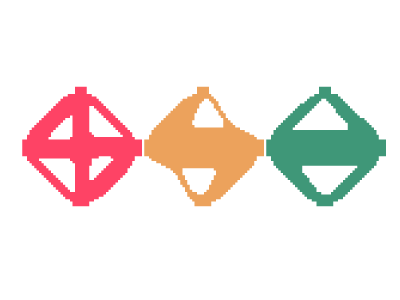

50 Obj:544.9335 Macro_Vol:0.54 Micro_Vol:[0.5, 0.5, 0.5] Macro_ch:0.02 Micro_ch:[0.05, 0.2, 0.2]
51 Obj:544.6231 Macro_Vol:0.54 Micro_Vol:[0.5, 0.5, 0.5] Macro_ch:0.02 Micro_ch:[0.06, 0.2, 0.2]
52 Obj:544.3391 Macro_Vol:0.54 Micro_Vol:[0.5, 0.5, 0.5] Macro_ch:0.02 Micro_ch:[0.06, 0.2, 0.2]
53 Obj:544.0746 Macro_Vol:0.54 Micro_Vol:[0.5, 0.5, 0.5] Macro_ch:0.02 Micro_ch:[0.07, 0.2, 0.2]
54 Obj:543.8273 Macro_Vol:0.54 Micro_Vol:[0.5, 0.5, 0.5] Macro_ch:0.02 Micro_ch:[0.07, 0.2, 0.2]


55 Obj:543.593 Macro_Vol:0.54 Micro_Vol:[0.5, 0.5, 0.5] Macro_ch:0.02 Micro_ch:[0.07, 0.2, 0.2]
56 Obj:543.3739 Macro_Vol:0.54 Micro_Vol:[0.5, 0.5, 0.5] Macro_ch:0.02 Micro_ch:[0.07, 0.2, 0.2]
57 Obj:543.1672 Macro_Vol:0.54 Micro_Vol:[0.5, 0.5, 0.5] Macro_ch:0.02 Micro_ch:[0.07, 0.2, 0.2]
58 Obj:542.9695 Macro_Vol:0.54 Micro_Vol:[0.5, 0.5, 0.5] Macro_ch:0.02 Micro_ch:[0.07, 0.2, 0.2]
59 Obj:542.7821 Macro_Vol:0.54 Micro_Vol:[0.5, 0.5, 0.5] Macro_ch:0.02 Micro_ch:[0.07, 0.2, 0.2]


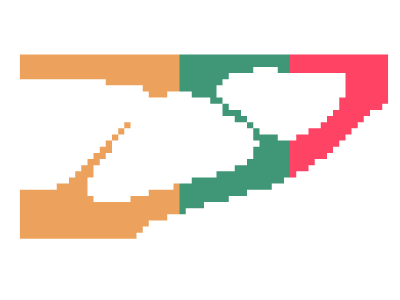

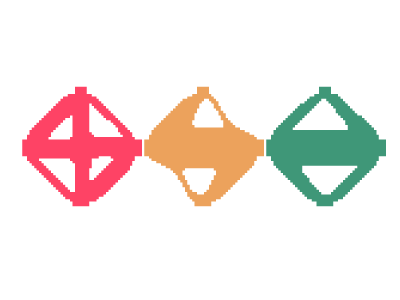

60 Obj:542.6052 Macro_Vol:0.54 Micro_Vol:[0.5, 0.5, 0.5] Macro_ch:0.02 Micro_ch:[0.05, 0.2, 0.2]
61 Obj:542.4381 Macro_Vol:0.54 Micro_Vol:[0.5, 0.5, 0.5] Macro_ch:0.02 Micro_ch:[0.05, 0.2, 0.2]
62 Obj:542.2814 Macro_Vol:0.54 Micro_Vol:[0.5, 0.5, 0.5] Macro_ch:0.02 Micro_ch:[0.05, 0.2, 0.2]
63 Obj:542.1351 Macro_Vol:0.54 Micro_Vol:[0.5, 0.5, 0.5] Macro_ch:0.02 Micro_ch:[0.06, 0.2, 0.2]
64 Obj:541.9959 Macro_Vol:0.54 Micro_Vol:[0.5, 0.5, 0.5] Macro_ch:0.02 Micro_ch:[0.06, 0.2, 0.2]


65 Obj:541.8645 Macro_Vol:0.54 Micro_Vol:[0.5, 0.5, 0.5] Macro_ch:0.02 Micro_ch:[0.06, 0.2, 0.2]
66 Obj:541.7497 Macro_Vol:0.54 Micro_Vol:[0.5, 0.5, 0.5] Macro_ch:0.02 Micro_ch:[0.06, 0.2, 0.2]
67 Obj:541.6223 Macro_Vol:0.54 Micro_Vol:[0.5, 0.5, 0.5] Macro_ch:0.02 Micro_ch:[0.06, 0.2, 0.2]


LoadError: [91mInterruptException:[39m

In [335]:
#macro mma
#micro mma
Macro_anim=Animation()
Micro_anim=Animation()

Macro_struct = [6, 3, 60, 30, [0.5,0.5],5.0];
Micro_struct = [0.1, 0.1, 50, 50,0.5,2.0];
penal = 3; 
saveItr=5;
θ=3
prob=MBB
maxloop=100

con=false 


Macro_xPhys3,Micro_xPhys3,Macro_masks3,Macro_xPhys_diag3,Micro_Vol3,DHs3=MultiConTop2DU(θ,Macro_struct, Micro_struct,prob, penal,saveItr,maxloop,con);


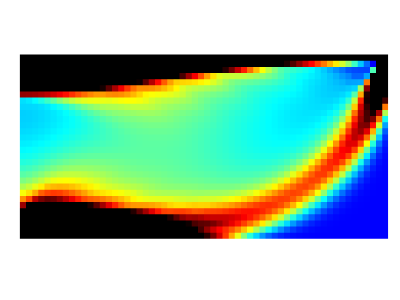

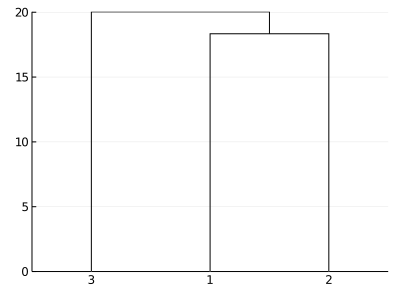

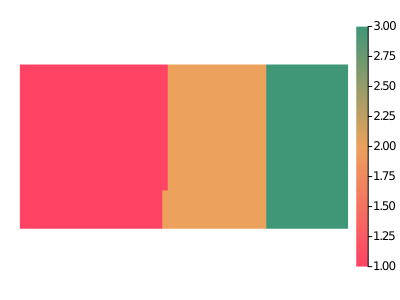

Mask 1 with density 0.2 occupies 44.61% of the macrostructure.
Mask 2 with density 0.2 occupies 30.39% of the macrostructure.
Mask 3 with density 0.2 occupies 25.0% of the macrostructure.
1 Obj:15375.0375 Macro_Vol:0.66 Micro_Vol:[0.2, 0.2, 0.2] Macro_ch:0.4 Micro_ch:[0.2, 0.2, 0.2]
2 Obj:36864.575 Macro_Vol:0.83 Micro_Vol:[0.2, 0.2, 0.2] Macro_ch:0.29 Micro_ch:[0.2, 0.2, 0.2]
3 Obj:8682.3958 Macro_Vol:0.82 Micro_Vol:[0.2, 0.2, 0.2] Macro_ch:0.28 Micro_ch:[0.2, 0.2, 0.2]
4 Obj:6704.3641 Macro_Vol:0.79 Micro_Vol:[0.2, 0.2, 0.2] Macro_ch:0.22 Micro_ch:[0.2, 0.2, 0.2]


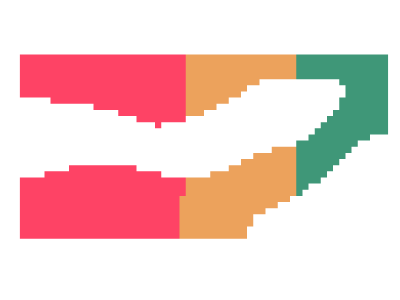

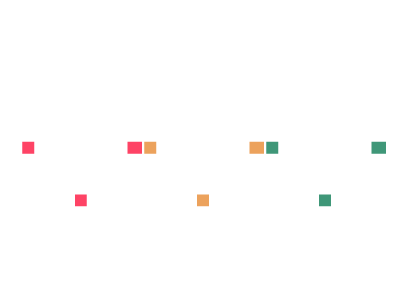

5 Obj:5545.7809 Macro_Vol:0.75 Micro_Vol:[0.2, 0.2, 0.2] Macro_ch:0.18 Micro_ch:[0.2, 0.2, 0.2]
6 Obj:4756.3286 Macro_Vol:0.71 Micro_Vol:[0.2, 0.2, 0.2] Macro_ch:0.18 Micro_ch:[0.2, 0.2, 0.2]
7 Obj:4175.5321 Macro_Vol:0.66 Micro_Vol:[0.2, 0.2, 0.2] Macro_ch:0.18 Micro_ch:[0.2, 0.2, 0.2]
8 Obj:3789.6053 Macro_Vol:0.62 Micro_Vol:[0.2, 0.2, 0.2] Macro_ch:0.18 Micro_ch:[0.2, 0.2, 0.2]
9 Obj:3546.7673 Macro_Vol:0.58 Micro_Vol:[0.2, 0.2, 0.2] Macro_ch:0.15 Micro_ch:[0.2, 0.2, 0.2]


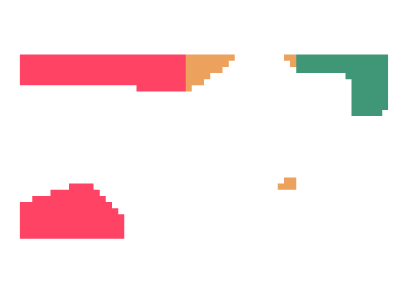

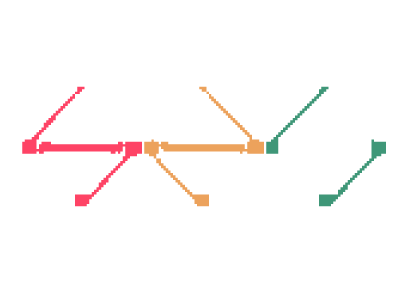

10 Obj:3408.1364 Macro_Vol:0.55 Micro_Vol:[0.2, 0.2, 0.2] Macro_ch:0.13 Micro_ch:[0.2, 0.2, 0.2]
11 Obj:3273.6708 Macro_Vol:0.56 Micro_Vol:[0.2, 0.2, 0.2] Macro_ch:0.08 Micro_ch:[0.2, 0.2, 0.2]
12 Obj:2981.2095 Macro_Vol:0.55 Micro_Vol:[0.2, 0.2, 0.2] Macro_ch:0.06 Micro_ch:[0.2, 0.2, 0.2]
13 Obj:2796.7255 Macro_Vol:0.55 Micro_Vol:[0.2, 0.2, 0.2] Macro_ch:0.06 Micro_ch:[0.2, 0.2, 0.2]
14 Obj:2657.1614 Macro_Vol:0.55 Micro_Vol:[0.2, 0.2, 0.2] Macro_ch:0.05 Micro_ch:[0.2, 0.2, 0.2]


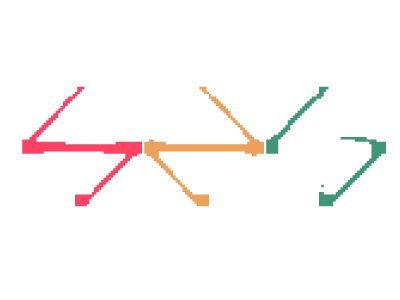

15 Obj:2544.4077 Macro_Vol:0.55 Micro_Vol:[0.2, 0.2, 0.2] Macro_ch:0.05 Micro_ch:[0.2, 0.2, 0.2]
16 Obj:2451.8179 Macro_Vol:0.55 Micro_Vol:[0.2, 0.2, 0.2] Macro_ch:0.04 Micro_ch:[0.2, 0.2, 0.2]
17 Obj:2376.775 Macro_Vol:0.55 Micro_Vol:[0.2, 0.2, 0.2] Macro_ch:0.04 Micro_ch:[0.2, 0.2, 0.2]
18 Obj:2318.584 Macro_Vol:0.55 Micro_Vol:[0.2, 0.2, 0.2] Macro_ch:0.04 Micro_ch:[0.2, 0.2, 0.2]
19 Obj:2271.8335 Macro_Vol:0.55 Micro_Vol:[0.2, 0.2, 0.2] Macro_ch:0.04 Micro_ch:[0.2, 0.2, 0.2]


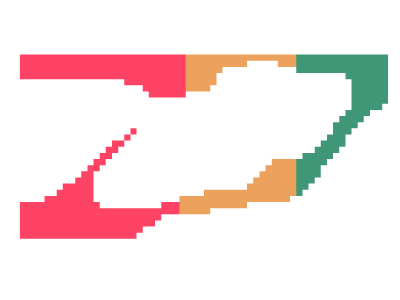

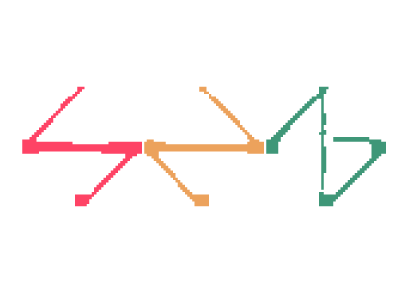

20 Obj:2233.6158 Macro_Vol:0.55 Micro_Vol:[0.2, 0.2, 0.2] Macro_ch:0.03 Micro_ch:[0.2, 0.2, 0.2]
21 Obj:2201.1576 Macro_Vol:0.55 Micro_Vol:[0.2, 0.2, 0.2] Macro_ch:0.03 Micro_ch:[0.2, 0.2, 0.2]
22 Obj:2173.4932 Macro_Vol:0.55 Micro_Vol:[0.2, 0.2, 0.2] Macro_ch:0.03 Micro_ch:[0.2, 0.2, 0.2]
23 Obj:2149.0592 Macro_Vol:0.55 Micro_Vol:[0.2, 0.2, 0.2] Macro_ch:0.03 Micro_ch:[0.2, 0.2, 0.2]
24 Obj:2127.8132 Macro_Vol:0.55 Micro_Vol:[0.2, 0.2, 0.2] Macro_ch:0.03 Micro_ch:[0.2, 0.2, 0.2]


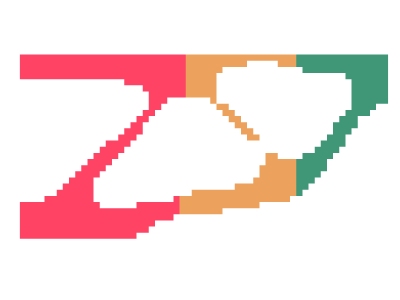

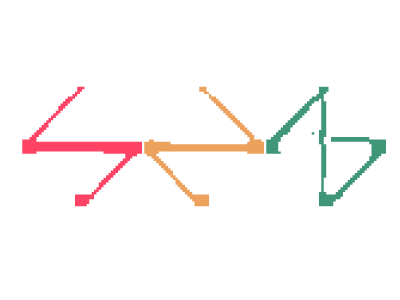

25 Obj:2108.9668 Macro_Vol:0.55 Micro_Vol:[0.2, 0.2, 0.2] Macro_ch:0.03 Micro_ch:[0.2, 0.2, 0.2]
26 Obj:2092.4826 Macro_Vol:0.55 Micro_Vol:[0.2, 0.2, 0.2] Macro_ch:0.03 Micro_ch:[0.2, 0.2, 0.2]
27 Obj:2077.7993 Macro_Vol:0.55 Micro_Vol:[0.2, 0.2, 0.2] Macro_ch:0.03 Micro_ch:[0.2, 0.2, 0.2]
28 Obj:2065.0439 Macro_Vol:0.55 Micro_Vol:[0.2, 0.2, 0.2] Macro_ch:0.03 Micro_ch:[0.2, 0.2, 0.2]
29 Obj:2053.6283 Macro_Vol:0.55 Micro_Vol:[0.2, 0.2, 0.2] Macro_ch:0.03 Micro_ch:[0.2, 0.2, 0.2]


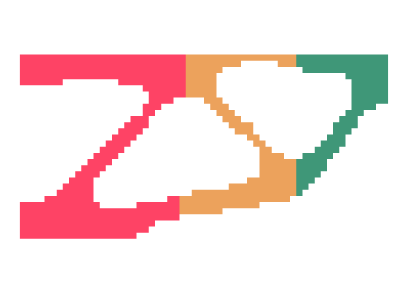

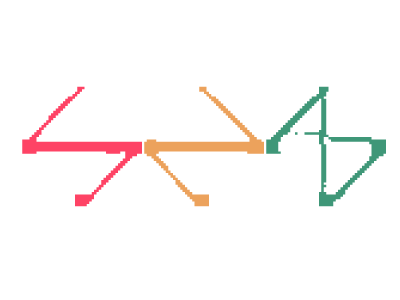

30 Obj:2043.7275 Macro_Vol:0.55 Micro_Vol:[0.2, 0.2, 0.2] Macro_ch:0.03 Micro_ch:[0.2, 0.2, 0.2]
31 Obj:2034.7658 Macro_Vol:0.55 Micro_Vol:[0.2, 0.2, 0.2] Macro_ch:0.02 Micro_ch:[0.2, 0.2, 0.2]
32 Obj:2027.3443 Macro_Vol:0.55 Micro_Vol:[0.2, 0.2, 0.2] Macro_ch:0.02 Micro_ch:[0.2, 0.2, 0.2]
33 Obj:2020.904 Macro_Vol:0.55 Micro_Vol:[0.2, 0.2, 0.2] Macro_ch:0.02 Micro_ch:[0.2, 0.2, 0.2]
34 Obj:2015.5332 Macro_Vol:0.55 Micro_Vol:[0.2, 0.2, 0.2] Macro_ch:0.02 Micro_ch:[0.2, 0.2, 0.2]


35 Obj:2011.0352 Macro_Vol:0.55 Micro_Vol:[0.2, 0.2, 0.2] Macro_ch:0.02 Micro_ch:[0.2, 0.2, 0.2]
36 Obj:2007.1888 Macro_Vol:0.55 Micro_Vol:[0.2, 0.2, 0.2] Macro_ch:0.02 Micro_ch:[0.2, 0.2, 0.2]
37 Obj:2003.6741 Macro_Vol:0.55 Micro_Vol:[0.2, 0.2, 0.2] Macro_ch:0.02 Micro_ch:[0.2, 0.2, 0.2]
38 Obj:2000.4579 Macro_Vol:0.55 Micro_Vol:[0.2, 0.2, 0.2] Macro_ch:0.02 Micro_ch:[0.2, 0.2, 0.2]
39 Obj:1997.4332 Macro_Vol:0.55 Micro_Vol:[0.2, 0.2, 0.2] Macro_ch:0.02 Micro_ch:[0.2, 0.2, 0.2]


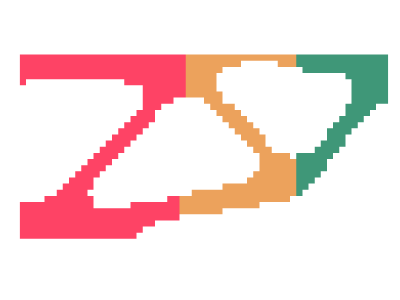

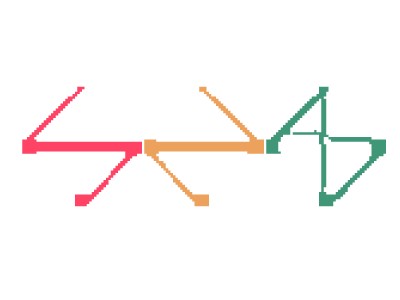

40 Obj:1994.6698 Macro_Vol:0.55 Micro_Vol:[0.2, 0.2, 0.2] Macro_ch:0.01 Micro_ch:[0.2, 0.2, 0.2]
41 Obj:1992.0301 Macro_Vol:0.55 Micro_Vol:[0.2, 0.2, 0.2] Macro_ch:0.01 Micro_ch:[0.2, 0.2, 0.2]
42 Obj:1989.5195 Macro_Vol:0.54 Micro_Vol:[0.2, 0.2, 0.2] Macro_ch:0.01 Micro_ch:[0.2, 0.2, 0.2]
43 Obj:1987.2045 Macro_Vol:0.54 Micro_Vol:[0.2, 0.2, 0.2] Macro_ch:0.01 Micro_ch:[0.2, 0.2, 0.2]
44 Obj:1985.167 Macro_Vol:0.54 Micro_Vol:[0.2, 0.2, 0.2] Macro_ch:0.01 Micro_ch:[0.2, 0.2, 0.2]


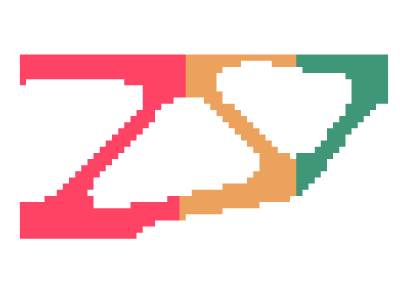

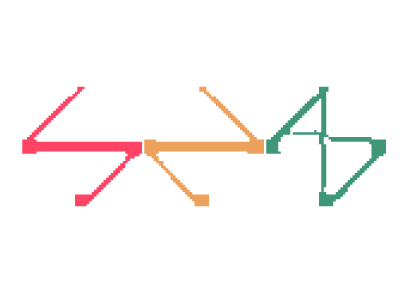

45 Obj:1983.2536 Macro_Vol:0.54 Micro_Vol:[0.2, 0.2, 0.2] Macro_ch:0.01 Micro_ch:[0.2, 0.2, 0.2]
46 Obj:1981.6938 Macro_Vol:0.54 Micro_Vol:[0.2, 0.2, 0.2] Macro_ch:0.01 Micro_ch:[0.2, 0.2, 0.2]
47 Obj:1980.2607 Macro_Vol:0.54 Micro_Vol:[0.2, 0.2, 0.2] Macro_ch:0.01 Micro_ch:[0.2, 0.2, 0.2]
48 Obj:1979.0083 Macro_Vol:0.54 Micro_Vol:[0.2, 0.2, 0.2] Macro_ch:0.01 Micro_ch:[0.2, 0.2, 0.2]
49 Obj:1977.823 Macro_Vol:0.54 Micro_Vol:[0.2, 0.2, 0.2] Macro_ch:0.01 Micro_ch:[0.2, 0.2, 0.2]


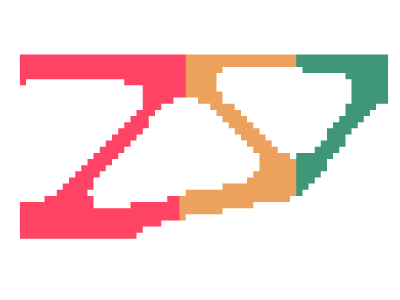

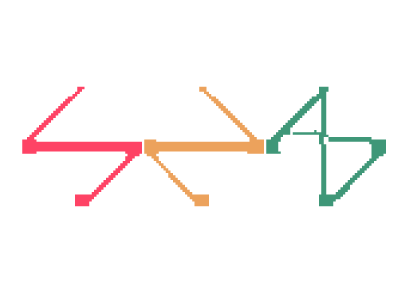

50 Obj:1976.7431 Macro_Vol:0.54 Micro_Vol:[0.2, 0.2, 0.2] Macro_ch:0.01 Micro_ch:[0.2, 0.2, 0.2]
51 Obj:1975.6714 Macro_Vol:0.54 Micro_Vol:[0.2, 0.2, 0.2] Macro_ch:0.01 Micro_ch:[0.2, 0.2, 0.2]
52 Obj:1974.7009 Macro_Vol:0.54 Micro_Vol:[0.2, 0.2, 0.2] Macro_ch:0.01 Micro_ch:[0.2, 0.2, 0.2]
53 Obj:1973.7155 Macro_Vol:0.54 Micro_Vol:[0.2, 0.2, 0.2] Macro_ch:0.01 Micro_ch:[0.2, 0.2, 0.2]
54 Obj:1972.7763 Macro_Vol:0.54 Micro_Vol:[0.2, 0.2, 0.2] Macro_ch:0.01 Micro_ch:[0.2, 0.2, 0.2]


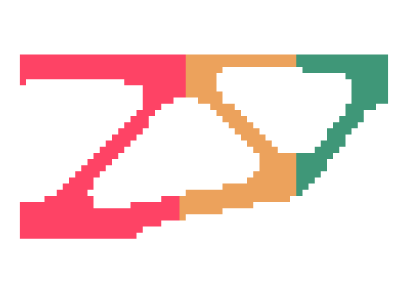

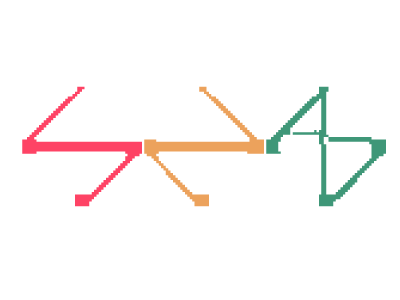

55 Obj:1971.8081 Macro_Vol:0.54 Micro_Vol:[0.2, 0.2, 0.2] Macro_ch:0.01 Micro_ch:[0.2, 0.2, 0.2]
56 Obj:1970.8927 Macro_Vol:0.54 Micro_Vol:[0.2, 0.2, 0.2] Macro_ch:0.01 Micro_ch:[0.2, 0.2, 0.2]
57 Obj:1970.0261 Macro_Vol:0.54 Micro_Vol:[0.2, 0.2, 0.2] Macro_ch:0.01 Micro_ch:[0.2, 0.2, 0.2]
58 Obj:1969.1268 Macro_Vol:0.54 Micro_Vol:[0.2, 0.2, 0.2] Macro_ch:0.01 Micro_ch:[0.2, 0.2, 0.2]
59 Obj:1968.4359 Macro_Vol:0.54 Micro_Vol:[0.2, 0.2, 0.2] Macro_ch:0.01 Micro_ch:[0.2, 0.2, 0.2]


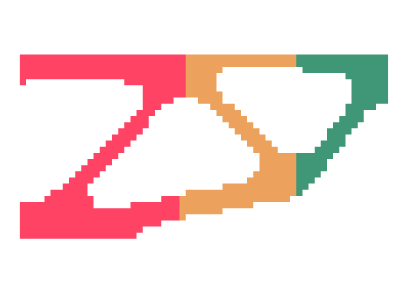

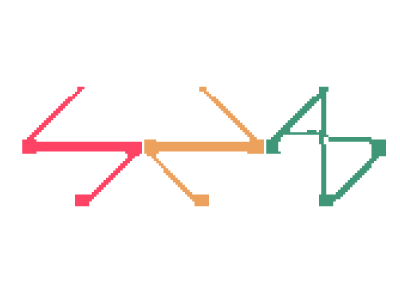

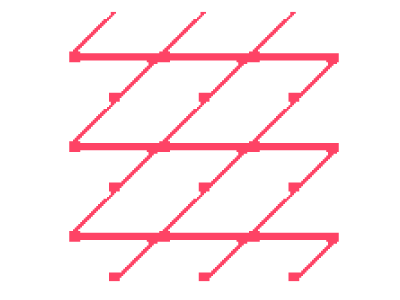

"young:[0.076, 0.005], poisson:[0.322, 0.02], shear:[0.004]"

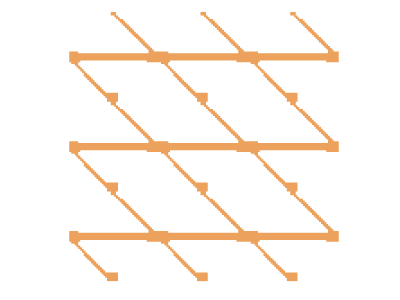

"young:[0.069, 0.007], poisson:[0.94, 0.102], shear:[0.008]"

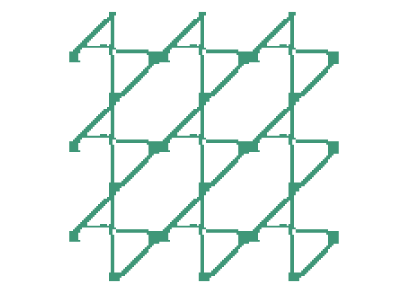

"young:[0.024, 0.028], poisson:[0.021, 0.024], shear:[0.007]"

60 Obj:1967.6485 Macro_Vol:0.54 Micro_Vol:[0.2, 0.2, 0.2] Macro_ch:0.01 Micro_ch:[0.2, 0.2, 0.2]


In [336]:
#macro mma
#micro mma
Macro_anim=Animation()
Micro_anim=Animation()

Macro_struct = [6, 3, 60, 30, [0.5,0.5],5.0];
Micro_struct = [0.1, 0.1, 50, 50,0.2,2.0];
penal = 3; 
saveItr=5;
θ=3
prob=MBB
maxloop=100

con=false 


Macro_xPhys3,Micro_xPhys3,Macro_masks3,Macro_xPhys_diag3,Micro_Vol3,DHs3=MultiConTop2DU(θ,Macro_struct, Micro_struct,prob, penal,saveItr,maxloop,con);


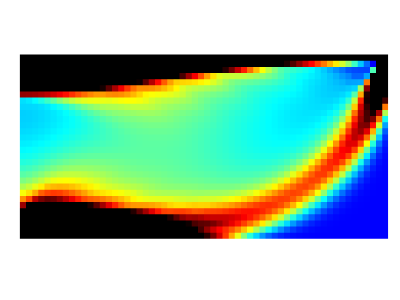

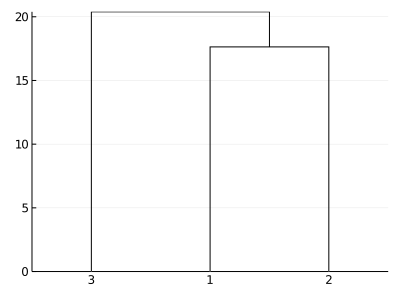

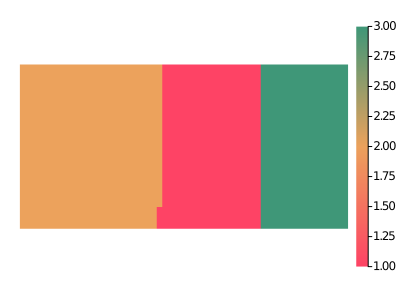

Mask 1 with density 0.5 occupies 30.22% of the macrostructure.
Mask 2 with density 0.5 occupies 43.11% of the macrostructure.
Mask 3 with density 0.5 occupies 26.67% of the macrostructure.
1 Obj:682.9688 Macro_Vol:0.55 Micro_Vol:[0.43, 0.47, 0.44] Macro_ch:0.39 Micro_ch:[0.39, 0.37, 0.37]
2 Obj:1719.7079 Macro_Vol:0.56 Micro_Vol:[0.51, 0.52, 0.51] Macro_ch:0.21 Micro_ch:[0.27, 0.24, 0.28]
3 Obj:839.6548 Macro_Vol:0.56 Micro_Vol:[0.52, 0.52, 0.52] Macro_ch:0.15 Micro_ch:[0.22, 0.18, 0.12]
4 Obj:710.4681 Macro_Vol:0.56 Micro_Vol:[0.51, 0.51, 0.52] Macro_ch:0.12 Micro_ch:[0.12, 0.1, 0.12]


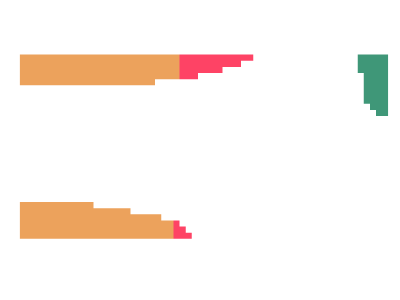

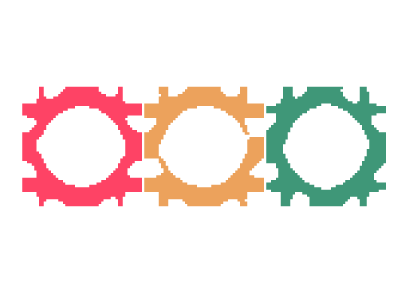

5 Obj:672.8326 Macro_Vol:0.56 Micro_Vol:[0.53, 0.52, 0.53] Macro_ch:0.11 Micro_ch:[0.1, 0.1, 0.07]
6 Obj:615.6378 Macro_Vol:0.56 Micro_Vol:[0.52, 0.52, 0.52] Macro_ch:0.1 Micro_ch:[0.11, 0.07, 0.09]
7 Obj:613.7947 Macro_Vol:0.56 Micro_Vol:[0.52, 0.52, 0.53] Macro_ch:0.09 Micro_ch:[0.06, 0.06, 0.08]
8 Obj:596.0061 Macro_Vol:0.56 Micro_Vol:[0.52, 0.52, 0.52] Macro_ch:0.09 Micro_ch:[0.08, 0.07, 0.08]
9 Obj:584.9203 Macro_Vol:0.56 Micro_Vol:[0.52, 0.52, 0.52] Macro_ch:0.08 Micro_ch:[0.06, 0.05, 0.08]


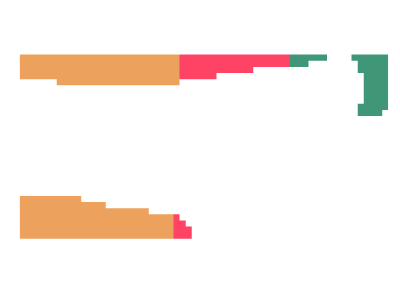

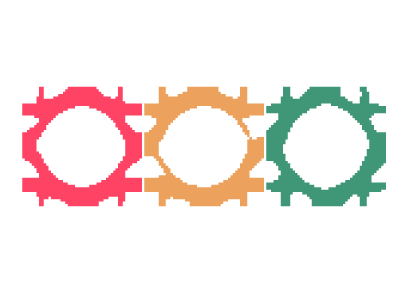

10 Obj:573.859 Macro_Vol:0.56 Micro_Vol:[0.52, 0.52, 0.52] Macro_ch:0.08 Micro_ch:[0.06, 0.07, 0.07]
11 Obj:575.8518 Macro_Vol:0.56 Micro_Vol:[0.52, 0.52, 0.52] Macro_ch:0.07 Micro_ch:[0.04, 0.07, 0.06]
12 Obj:560.8035 Macro_Vol:0.56 Micro_Vol:[0.52, 0.52, 0.52] Macro_ch:0.07 Micro_ch:[0.05, 0.05, 0.07]
13 Obj:557.9639 Macro_Vol:0.55 Micro_Vol:[0.51, 0.52, 0.52] Macro_ch:0.07 Micro_ch:[0.08, 0.05, 0.06]
14 Obj:554.6243 Macro_Vol:0.55 Micro_Vol:[0.52, 0.52, 0.52] Macro_ch:0.06 Micro_ch:[0.06, 0.07, 0.06]


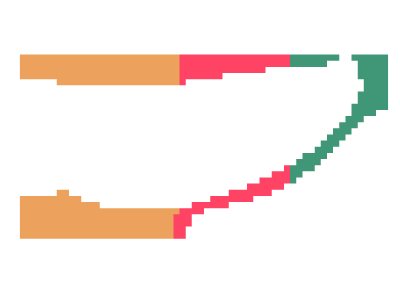

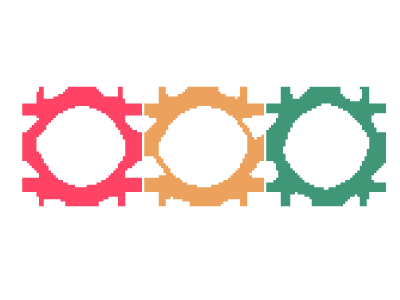

15 Obj:545.7962 Macro_Vol:0.55 Micro_Vol:[0.52, 0.52, 0.52] Macro_ch:0.06 Micro_ch:[0.08, 0.05, 0.06]
16 Obj:541.2035 Macro_Vol:0.55 Micro_Vol:[0.52, 0.51, 0.52] Macro_ch:0.06 Micro_ch:[0.05, 0.05, 0.05]
17 Obj:542.5123 Macro_Vol:0.55 Micro_Vol:[0.52, 0.52, 0.52] Macro_ch:0.05 Micro_ch:[0.07, 0.09, 0.06]
18 Obj:532.2192 Macro_Vol:0.55 Micro_Vol:[0.52, 0.52, 0.52] Macro_ch:0.05 Micro_ch:[0.05, 0.05, 0.04]
19 Obj:531.8842 Macro_Vol:0.55 Micro_Vol:[0.52, 0.52, 0.52] Macro_ch:0.05 Micro_ch:[0.07, 0.05, 0.03]


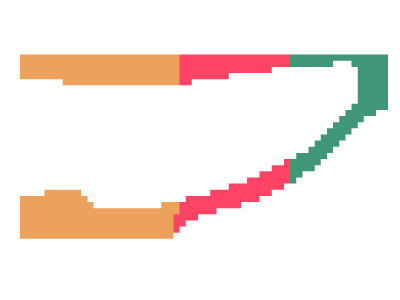

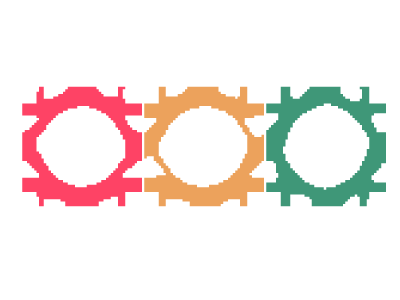

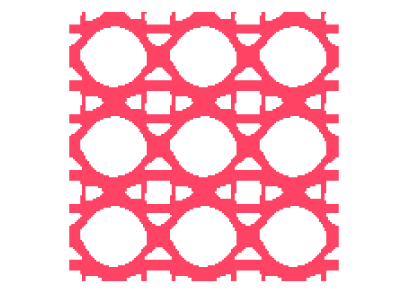

"young:[0.23, 0.151], poisson:[0.421, 0.277], shear:[0.068]"

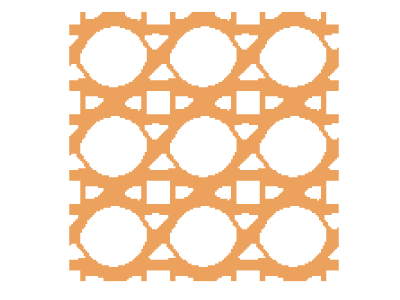

"young:[0.234, 0.145], poisson:[0.39, 0.241], shear:[0.057]"

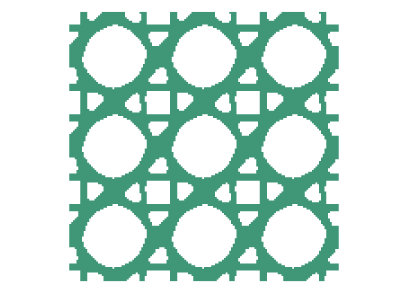

"young:[0.194, 0.188], poisson:[0.353, 0.342], shear:[0.067]"

20 Obj:530.1262 Macro_Vol:0.55 Micro_Vol:[0.52, 0.52, 0.52] Macro_ch:0.05 Micro_ch:[0.04, 0.08, 0.05]


In [325]:
#macro mma
#micro mma
Macro_anim=Animation()
Micro_anim=Animation()

Macro_struct = [6, 3, 60, 30, [0.5,0.5],5.0];
Micro_struct = [0.1, 0.1, 50, 50,0.5,2.0];
penal = 3; 
saveItr=5;
θ=3
prob=MBB
maxloop=20

con=true 


Macro_xPhys3,Micro_xPhys3,Macro_masks3,Macro_xPhys_diag3,Micro_Vol3,DHs3=MultiConTop2DU(θ,Macro_struct, Micro_struct,prob, penal,saveItr,maxloop,con);


---

# Compliant

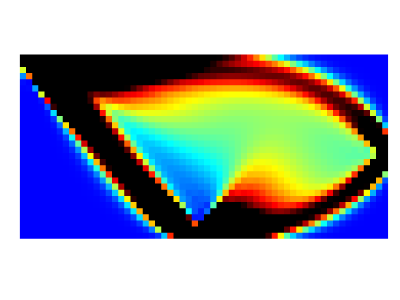

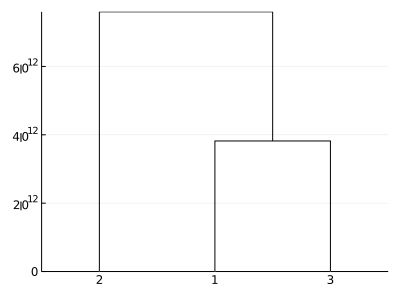

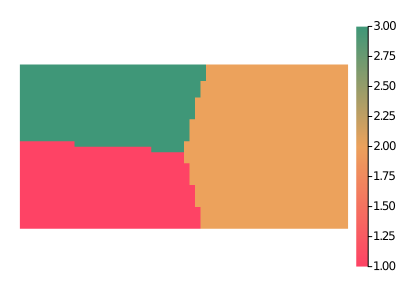

Mask 1 with density 0.5 occupies 26.56% of the macrostructure.
Mask 2 with density 0.5 occupies 46.83% of the macrostructure.
Mask 3 with density 0.5 occupies 26.61% of the macrostructure.


GKS: character ignored due to unicode error
GKS: character ignored due to unicode error
GKS: character ignored due to unicode error
GKS: character ignored due to unicode error
GKS: character ignored due to unicode error
GKS: character ignored due to unicode error
GKS: character ignored due to unicode error
GKS: character ignored due to unicode error
GKS: character ignored due to unicode error
GKS: character ignored due to unicode error
GKS: character ignored due to unicode error
GKS: character ignored due to unicode error
GKS: character ignored due to unicode error
GKS: character ignored due to unicode error
GKS: character ignored due to unicode error


1 Obj:-0.0 Macro_Vol:0.5 Micro_Vol:[0.55, 0.55, 0.55] Macro_ch:0.1 Micro_ch:[0.2, 0.2, 0.2]
2 Obj:-0.0 Macro_Vol:0.5 Micro_Vol:[0.5, 0.5, 0.5] Macro_ch:0.1 Micro_ch:[0.2, 0.2, 0.2]
3 Obj:-0.0 Macro_Vol:0.5 Micro_Vol:[0.5, 0.5, 0.5] Macro_ch:0.1 Micro_ch:[0.2, 0.2, 0.2]
4 Obj:-0.0 Macro_Vol:0.5 Micro_Vol:[0.5, 0.5, 0.5] Macro_ch:0.1 Micro_ch:[0.2, 0.18, 0.2]


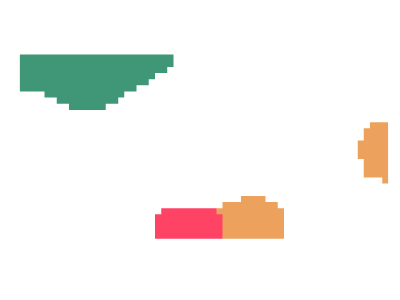

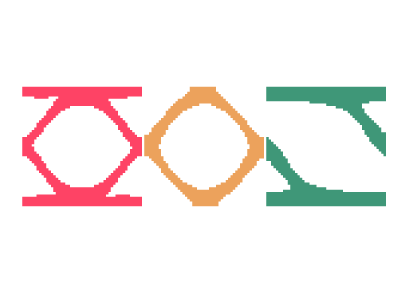

5 Obj:-0.0 Macro_Vol:0.5 Micro_Vol:[0.5, 0.5, 0.5] Macro_ch:0.1 Micro_ch:[0.17, 0.13, 0.2]
6 Obj:-0.0 Macro_Vol:0.5 Micro_Vol:[0.5, 0.5, 0.5] Macro_ch:0.1 Micro_ch:[0.15, 0.11, 0.16]
7 Obj:-0.0 Macro_Vol:0.5 Micro_Vol:[0.5, 0.5, 0.5] Macro_ch:0.09 Micro_ch:[0.15, 0.09, 0.18]
8 Obj:-0.0 Macro_Vol:0.5 Micro_Vol:[0.5, 0.5, 0.5] Macro_ch:0.07 Micro_ch:[0.18, 0.08, 0.17]
9 Obj:-0.0 Macro_Vol:0.5 Micro_Vol:[0.5, 0.5, 0.5] Macro_ch:0.07 Micro_ch:[0.2, 0.06, 0.16]


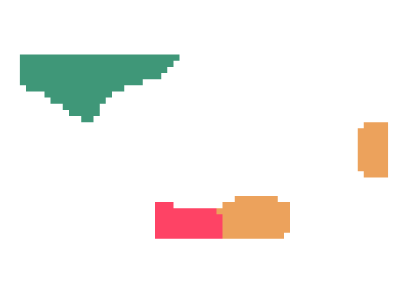

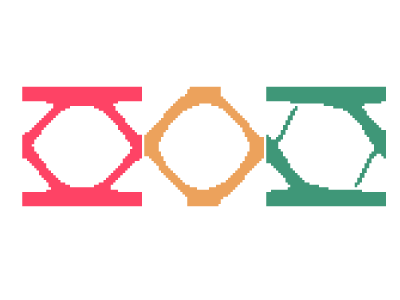

10 Obj:-0.0 Macro_Vol:0.5 Micro_Vol:[0.5, 0.5, 0.5] Macro_ch:0.06 Micro_ch:[0.2, 0.06, 0.19]
11 Obj:-0.0 Macro_Vol:0.5 Micro_Vol:[0.5, 0.5, 0.5] Macro_ch:0.06 Micro_ch:[0.2, 0.07, 0.2]
12 Obj:-0.0 Macro_Vol:0.5 Micro_Vol:[0.5, 0.5, 0.5] Macro_ch:0.05 Micro_ch:[0.19, 0.06, 0.19]
13 Obj:-0.0 Macro_Vol:0.5 Micro_Vol:[0.5, 0.5, 0.5] Macro_ch:0.05 Micro_ch:[0.18, 0.06, 0.2]
14 Obj:-0.0 Macro_Vol:0.5 Micro_Vol:[0.5, 0.5, 0.5] Macro_ch:0.05 Micro_ch:[0.14, 0.06, 0.18]


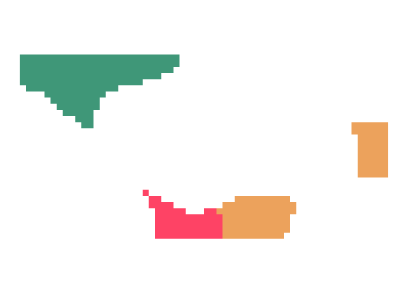

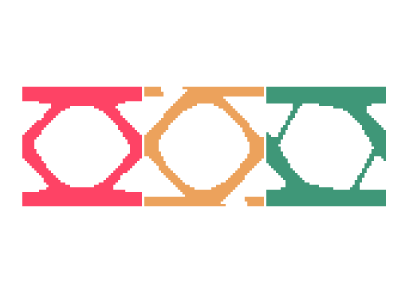

15 Obj:-0.0 Macro_Vol:0.5 Micro_Vol:[0.5, 0.5, 0.5] Macro_ch:0.05 Micro_ch:[0.12, 0.06, 0.18]
16 Obj:-0.0 Macro_Vol:0.5 Micro_Vol:[0.5, 0.5, 0.5] Macro_ch:0.05 Micro_ch:[0.12, 0.08, 0.14]
17 Obj:-0.0 Macro_Vol:0.5 Micro_Vol:[0.5, 0.5, 0.5] Macro_ch:0.04 Micro_ch:[0.12, 0.11, 0.15]
18 Obj:-0.0 Macro_Vol:0.5 Micro_Vol:[0.5, 0.5, 0.5] Macro_ch:0.04 Micro_ch:[0.07, 0.1, 0.12]
19 Obj:-0.0 Macro_Vol:0.5 Micro_Vol:[0.5, 0.5, 0.5] Macro_ch:0.04 Micro_ch:[0.07, 0.1, 0.12]


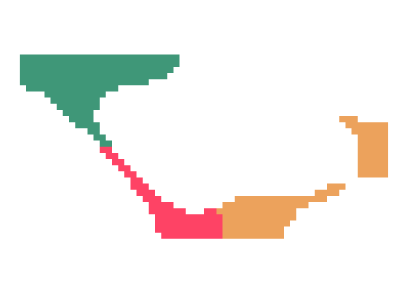

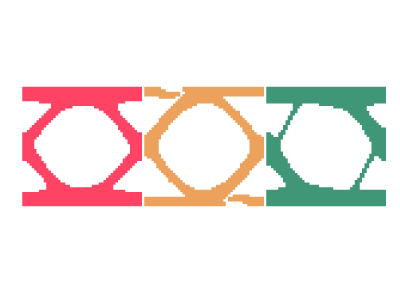

20 Obj:-0.0 Macro_Vol:0.5 Micro_Vol:[0.5, 0.5, 0.5] Macro_ch:0.04 Micro_ch:[0.08, 0.07, 0.1]
1 Obj:-0.0 Macro_Vol:0.5 Micro_Vol:[0.5, 0.5, 0.5] Macro_ch:0.1 Micro_ch:[0.2, 0.11, 0.12]
2 Obj:-0.0 Macro_Vol:0.5 Micro_Vol:[0.5, 0.5, 0.5] Macro_ch:0.1 Micro_ch:[0.2, 0.13, 0.14]
3 Obj:-0.0 Macro_Vol:0.5 Micro_Vol:[0.5, 0.5, 0.5] Macro_ch:0.1 Micro_ch:[0.2, 0.13, 0.1]
4 Obj:-0.0 Macro_Vol:0.5 Micro_Vol:[0.5, 0.5, 0.5] Macro_ch:0.1 Micro_ch:[0.2, 0.16, 0.08]


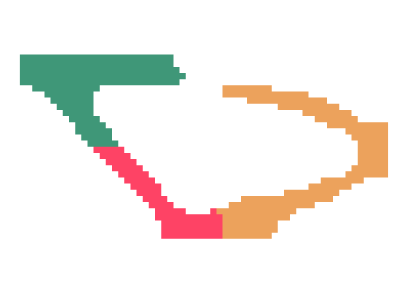

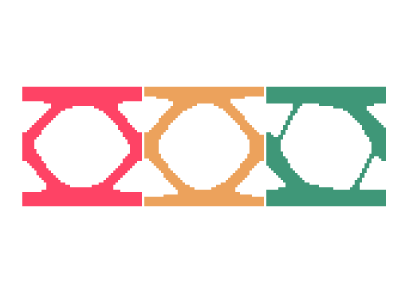

5 Obj:-0.0 Macro_Vol:0.5 Micro_Vol:[0.5, 0.5, 0.5] Macro_ch:0.1 Micro_ch:[0.17, 0.14, 0.05]
6 Obj:-0.0 Macro_Vol:0.5 Micro_Vol:[0.5, 0.5, 0.5] Macro_ch:0.1 Micro_ch:[0.2, 0.18, 0.05]
7 Obj:-0.0 Macro_Vol:0.5 Micro_Vol:[0.5, 0.5, 0.5] Macro_ch:0.1 Micro_ch:[0.18, 0.19, 0.05]
8 Obj:-0.0 Macro_Vol:0.5 Micro_Vol:[0.5, 0.5, 0.5] Macro_ch:0.1 Micro_ch:[0.13, 0.2, 0.06]
9 Obj:-0.0 Macro_Vol:0.5 Micro_Vol:[0.5, 0.5, 0.5] Macro_ch:0.09 Micro_ch:[0.1, 0.2, 0.07]


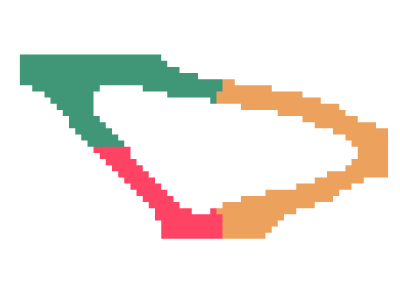

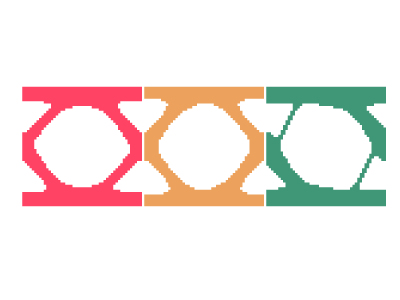

10 Obj:-0.0 Macro_Vol:0.5 Micro_Vol:[0.5, 0.5, 0.5] Macro_ch:0.1 Micro_ch:[0.13, 0.2, 0.07]
11 Obj:-0.0 Macro_Vol:0.5 Micro_Vol:[0.5, 0.5, 0.5] Macro_ch:0.1 Micro_ch:[0.15, 0.17, 0.07]
12 Obj:-0.0 Macro_Vol:0.5 Micro_Vol:[0.5, 0.5, 0.5] Macro_ch:0.09 Micro_ch:[0.16, 0.11, 0.07]
13 Obj:-0.0 Macro_Vol:0.5 Micro_Vol:[0.5, 0.5, 0.5] Macro_ch:0.09 Micro_ch:[0.11, 0.11, 0.07]
14 Obj:-0.0 Macro_Vol:0.5 Micro_Vol:[0.5, 0.5, 0.5] Macro_ch:0.09 Micro_ch:[0.08, 0.1, 0.07]


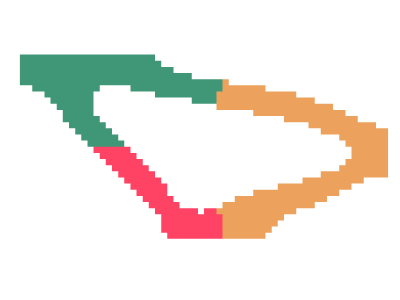

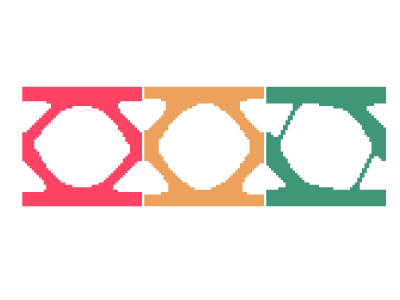

15 Obj:-0.0 Macro_Vol:0.5 Micro_Vol:[0.5, 0.5, 0.5] Macro_ch:0.1 Micro_ch:[0.07, 0.08, 0.05]
16 Obj:-0.0 Macro_Vol:0.5 Micro_Vol:[0.5, 0.5, 0.5] Macro_ch:0.09 Micro_ch:[0.07, 0.07, 0.02]
17 Obj:-0.0 Macro_Vol:0.5 Micro_Vol:[0.5, 0.5, 0.5] Macro_ch:0.1 Micro_ch:[0.07, 0.05, 0.02]
18 Obj:-0.0 Macro_Vol:0.5 Micro_Vol:[0.5, 0.5, 0.5] Macro_ch:0.09 Micro_ch:[0.07, 0.05, 0.02]
19 Obj:-0.0 Macro_Vol:0.5 Micro_Vol:[0.5, 0.5, 0.5] Macro_ch:0.08 Micro_ch:[0.07, 0.05, 0.02]


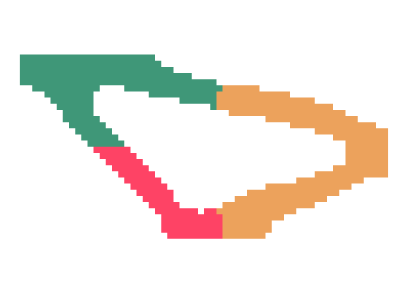

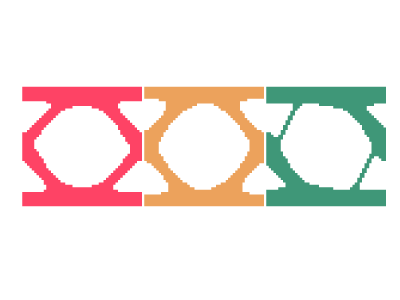

20 Obj:-0.0 Macro_Vol:0.5 Micro_Vol:[0.5, 0.5, 0.5] Macro_ch:0.09 Micro_ch:[0.06, 0.05, 0.01]
1 Obj:-0.0 Macro_Vol:0.5 Micro_Vol:[0.5, 0.5, 0.5] Macro_ch:0.1 Micro_ch:[0.05, 0.09, 0.02]
2 Obj:-0.0 Macro_Vol:0.5 Micro_Vol:[0.5, 0.5, 0.5] Macro_ch:0.1 Micro_ch:[0.06, 0.1, 0.02]
3 Obj:-0.0 Macro_Vol:0.5 Micro_Vol:[0.5, 0.5, 0.5] Macro_ch:0.1 Micro_ch:[0.08, 0.11, 0.02]
4 Obj:-0.0 Macro_Vol:0.5 Micro_Vol:[0.5, 0.5, 0.5] Macro_ch:0.1 Micro_ch:[0.1, 0.12, 0.02]


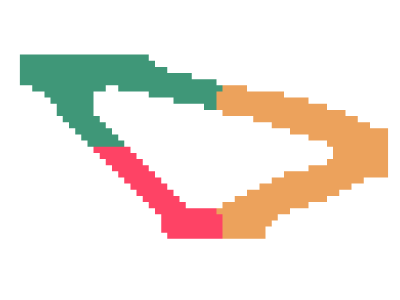

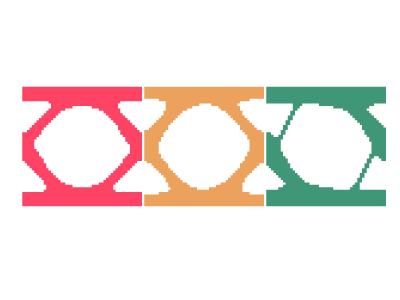

5 Obj:-0.0 Macro_Vol:0.5 Micro_Vol:[0.5, 0.5, 0.5] Macro_ch:0.1 Micro_ch:[0.13, 0.13, 0.02]
6 Obj:-0.0 Macro_Vol:0.5 Micro_Vol:[0.5, 0.5, 0.5] Macro_ch:0.1 Micro_ch:[0.16, 0.09, 0.01]
7 Obj:-0.0 Macro_Vol:0.5 Micro_Vol:[0.5, 0.5, 0.5] Macro_ch:0.1 Micro_ch:[0.18, 0.1, 0.01]
8 Obj:-0.0 Macro_Vol:0.5 Micro_Vol:[0.5, 0.5, 0.5] Macro_ch:0.1 Micro_ch:[0.14, 0.11, 0.01]
9 Obj:-0.0 Macro_Vol:0.5 Micro_Vol:[0.5, 0.5, 0.5] Macro_ch:0.09 Micro_ch:[0.13, 0.07, 0.01]


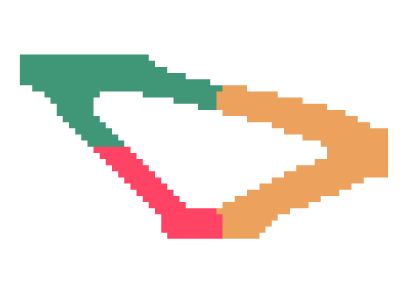

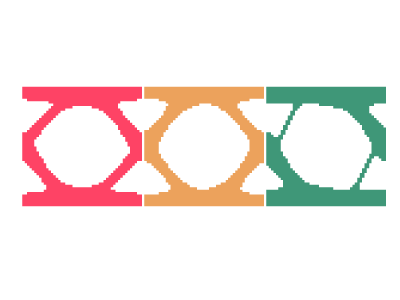

10 Obj:-0.0 Macro_Vol:0.5 Micro_Vol:[0.5, 0.5, 0.5] Macro_ch:0.09 Micro_ch:[0.13, 0.04, 0.01]
11 Obj:-0.0 Macro_Vol:0.5 Micro_Vol:[0.5, 0.5, 0.5] Macro_ch:0.08 Micro_ch:[0.04, 0.04, 0.01]
12 Obj:-0.0 Macro_Vol:0.5 Micro_Vol:[0.5, 0.5, 0.5] Macro_ch:0.08 Micro_ch:[0.04, 0.04, 0.01]
13 Obj:-0.0 Macro_Vol:0.5 Micro_Vol:[0.5, 0.5, 0.5] Macro_ch:0.09 Micro_ch:[0.05, 0.04, 0.01]
14 Obj:-0.0 Macro_Vol:0.5 Micro_Vol:[0.5, 0.5, 0.5] Macro_ch:0.08 Micro_ch:[0.05, 0.03, 0.01]


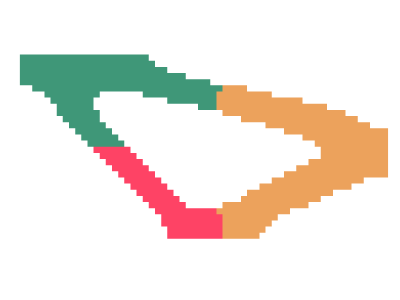

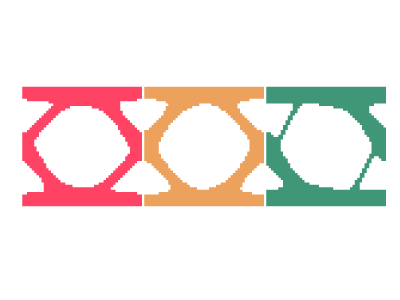

15 Obj:-0.0 Macro_Vol:0.5 Micro_Vol:[0.5, 0.5, 0.5] Macro_ch:0.07 Micro_ch:[0.06, 0.03, 0.01]
16 Obj:-0.0 Macro_Vol:0.5 Micro_Vol:[0.5, 0.5, 0.5] Macro_ch:0.07 Micro_ch:[0.06, 0.03, 0.01]
17 Obj:-0.0 Macro_Vol:0.5 Micro_Vol:[0.5, 0.5, 0.5] Macro_ch:0.08 Micro_ch:[0.07, 0.04, 0.01]
18 Obj:-0.0 Macro_Vol:0.5 Micro_Vol:[0.5, 0.5, 0.5] Macro_ch:0.07 Micro_ch:[0.07, 0.04, 0.01]
19 Obj:-0.0 Macro_Vol:0.5 Micro_Vol:[0.5, 0.5, 0.5] Macro_ch:0.08 Micro_ch:[0.07, 0.04, 0.01]


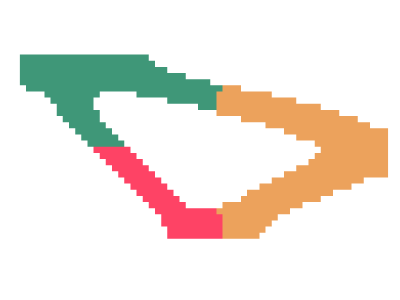

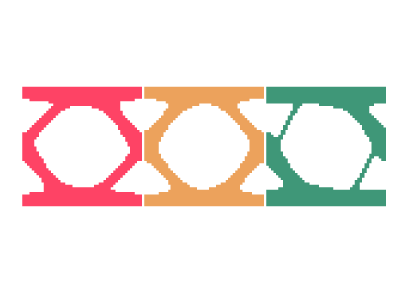

20 Obj:-0.0 Macro_Vol:0.5 Micro_Vol:[0.5, 0.5, 0.5] Macro_ch:0.05 Micro_ch:[0.07, 0.04, 0.01]
1 Obj:-0.0 Macro_Vol:0.5 Micro_Vol:[0.5, 0.5, 0.5] Macro_ch:0.08 Micro_ch:[0.17, 0.06, 0.03]
2 Obj:-0.0 Macro_Vol:0.5 Micro_Vol:[0.5, 0.5, 0.5] Macro_ch:0.09 Micro_ch:[0.16, 0.06, 0.02]
3 Obj:-0.0 Macro_Vol:0.5 Micro_Vol:[0.5, 0.5, 0.5] Macro_ch:0.08 Micro_ch:[0.2, 0.06, 0.02]
4 Obj:-0.0 Macro_Vol:0.5 Micro_Vol:[0.5, 0.5, 0.5] Macro_ch:0.08 Micro_ch:[0.16, 0.06, 0.02]


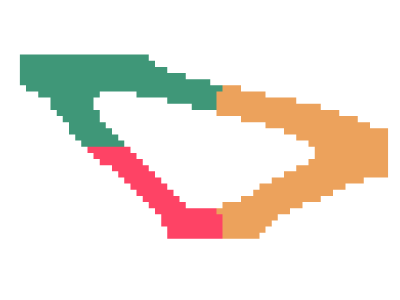

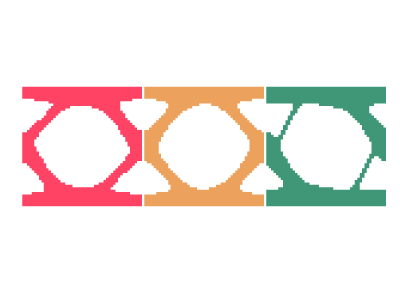

5 Obj:-0.0 Macro_Vol:0.5 Micro_Vol:[0.5, 0.5, 0.5] Macro_ch:0.08 Micro_ch:[0.11, 0.05, 0.02]
6 Obj:-0.0 Macro_Vol:0.5 Micro_Vol:[0.5, 0.5, 0.5] Macro_ch:0.06 Micro_ch:[0.03, 0.05, 0.02]
7 Obj:-0.0 Macro_Vol:0.5 Micro_Vol:[0.5, 0.5, 0.5] Macro_ch:0.07 Micro_ch:[0.03, 0.05, 0.02]
8 Obj:-0.0 Macro_Vol:0.5 Micro_Vol:[0.5, 0.5, 0.5] Macro_ch:0.07 Micro_ch:[0.04, 0.06, 0.01]
9 Obj:-0.0 Macro_Vol:0.5 Micro_Vol:[0.5, 0.5, 0.5] Macro_ch:0.05 Micro_ch:[0.05, 0.07, 0.01]


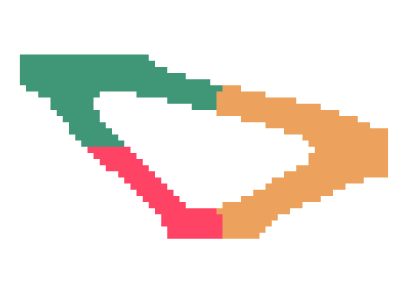

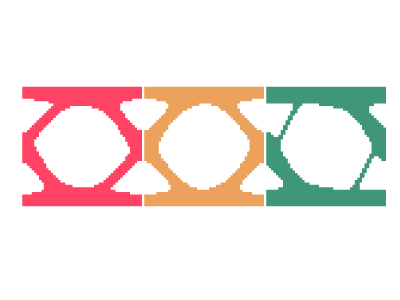

10 Obj:-0.0 Macro_Vol:0.5 Micro_Vol:[0.5, 0.5, 0.5] Macro_ch:0.05 Micro_ch:[0.07, 0.08, 0.02]
11 Obj:-0.0 Macro_Vol:0.5 Micro_Vol:[0.5, 0.5, 0.5] Macro_ch:0.06 Micro_ch:[0.09, 0.1, 0.04]
12 Obj:-0.0 Macro_Vol:0.5 Micro_Vol:[0.5, 0.5, 0.5] Macro_ch:0.06 Micro_ch:[0.12, 0.12, 0.07]
13 Obj:-0.0 Macro_Vol:0.5 Micro_Vol:[0.5, 0.5, 0.5] Macro_ch:0.06 Micro_ch:[0.15, 0.13, 0.12]
14 Obj:-0.0 Macro_Vol:0.5 Micro_Vol:[0.5, 0.5, 0.5] Macro_ch:0.05 Micro_ch:[0.19, 0.15, 0.2]


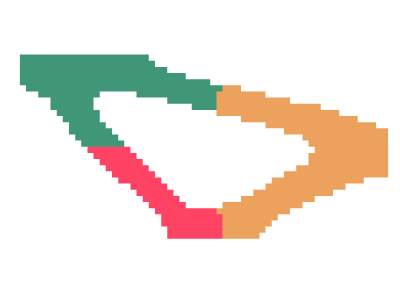

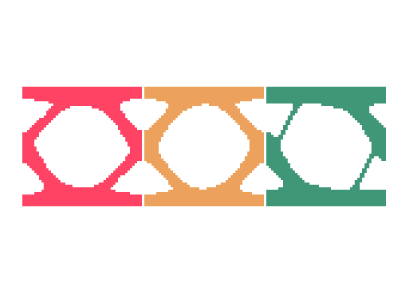

15 Obj:-0.0 Macro_Vol:0.5 Micro_Vol:[0.5, 0.5, 0.5] Macro_ch:0.04 Micro_ch:[0.2, 0.15, 0.2]
16 Obj:-0.0 Macro_Vol:0.5 Micro_Vol:[0.5, 0.5, 0.5] Macro_ch:0.05 Micro_ch:[0.07, 0.1, 0.2]
17 Obj:-0.0 Macro_Vol:0.5 Micro_Vol:[0.5, 0.5, 0.5] Macro_ch:0.05 Micro_ch:[0.02, 0.06, 0.11]
18 Obj:-0.0 Macro_Vol:0.5 Micro_Vol:[0.5, 0.5, 0.5] Macro_ch:0.05 Micro_ch:[0.03, 0.07, 0.12]
19 Obj:-0.0 Macro_Vol:0.5 Micro_Vol:[0.5, 0.5, 0.5] Macro_ch:0.03 Micro_ch:[0.03, 0.07, 0.2]


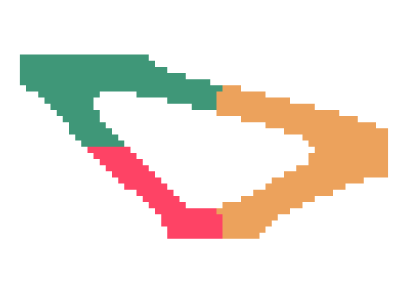

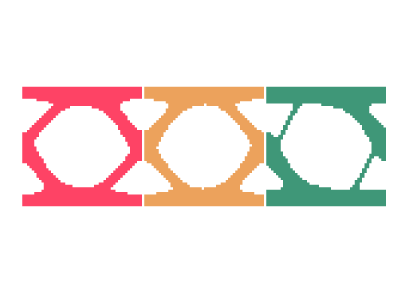

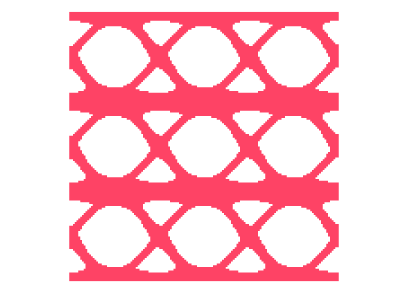

"young:[0.274, 0.105], poisson:[0.592, 0.228], shear:[0.063]"

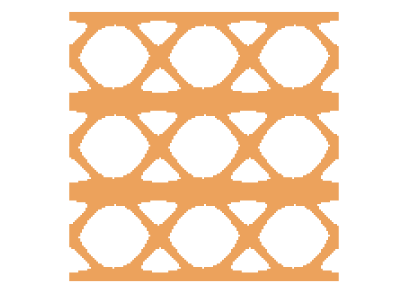

"young:[0.274, 0.116], poisson:[0.547, 0.232], shear:[0.065]"

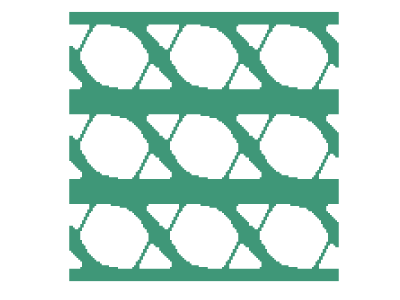

"young:[0.291, 0.11], poisson:[0.339, 0.127], shear:[0.043]"

20 Obj:-0.0 Macro_Vol:0.5 Micro_Vol:[0.5, 0.5, 0.5] Macro_ch:0.03 Micro_ch:[0.04, 0.08, 0.2]


In [227]:
# micro not mma
Macro_anim=Animation()
Micro_anim=Animation()

Macro_struct = [6, 3, 60, 30, [0.5,0.5],5.0];
Micro_struct = [0.1, 0.1, 20, 20,0.5,2.0];
penal = 3; 
saveItr=5;
θ=3
prob=wing2D
maxloop=20

con=false

Macro_xPhys3,Micro_xPhys3,Macro_masks3,Macro_xPhys_diag3,Micro_Vol3,DHs3=CompliantMultiConTop2DU(θ,Macro_struct, Micro_struct,prob, penal,saveItr,maxloop,con);


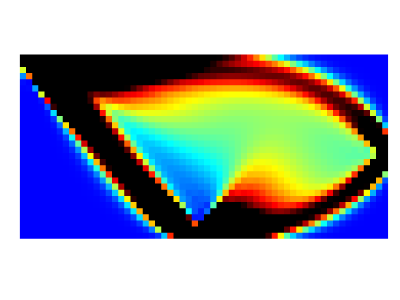

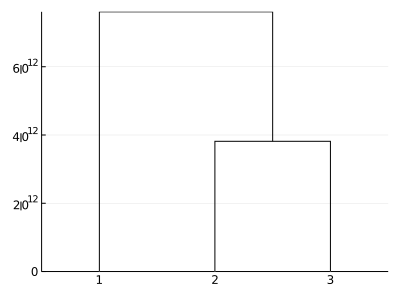

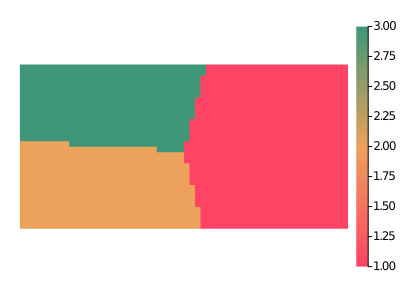

Mask 1 with density 0.5 occupies 46.89% of the macrostructure.
Mask 2 with density 0.5 occupies 26.56% of the macrostructure.
Mask 3 with density 0.5 occupies 26.56% of the macrostructure.


GKS: character ignored due to unicode error
GKS: character ignored due to unicode error
GKS: character ignored due to unicode error
GKS: character ignored due to unicode error
GKS: character ignored due to unicode error
GKS: character ignored due to unicode error
GKS: character ignored due to unicode error
GKS: character ignored due to unicode error
GKS: character ignored due to unicode error
GKS: character ignored due to unicode error
GKS: character ignored due to unicode error
GKS: character ignored due to unicode error
GKS: character ignored due to unicode error
GKS: character ignored due to unicode error
GKS: character ignored due to unicode error


1 Obj:-0.0 Macro_Vol:0.5 Micro_Vol:[0.45, 0.45, 0.45] Macro_ch:0.1 Micro_ch:[0.4, 0.4, 0.4]
2 Obj:-0.0 Macro_Vol:0.5 Micro_Vol:[0.47, 0.47, 0.47] Macro_ch:0.1 Micro_ch:[0.04, 0.04, 0.04]
3 Obj:-0.0 Macro_Vol:0.5 Micro_Vol:[0.48, 0.48, 0.49] Macro_ch:0.1 Micro_ch:[0.02, 0.02, 0.04]
4 Obj:-0.0 Macro_Vol:0.5 Micro_Vol:[0.49, 0.49, 0.5] Macro_ch:0.1 Micro_ch:[0.02, 0.02, 0.04]


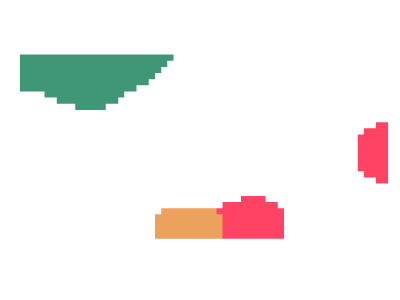

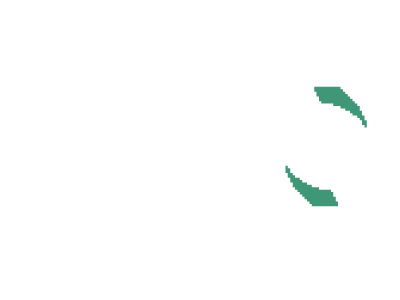

5 Obj:-0.0 Macro_Vol:0.5 Micro_Vol:[0.5, 0.5, 0.52] Macro_ch:0.1 Micro_ch:[0.02, 0.02, 0.05]
6 Obj:-0.0 Macro_Vol:0.5 Micro_Vol:[0.51, 0.51, 0.53] Macro_ch:0.1 Micro_ch:[0.02, 0.02, 0.05]
7 Obj:-0.0 Macro_Vol:0.5 Micro_Vol:[0.52, 0.52, 0.55] Macro_ch:0.09 Micro_ch:[0.02, 0.02, 0.04]
8 Obj:-0.0 Macro_Vol:0.5 Micro_Vol:[0.53, 0.53, 0.55] Macro_ch:0.07 Micro_ch:[0.02, 0.02, 0.03]
9 Obj:-0.0 Macro_Vol:0.5 Micro_Vol:[0.54, 0.54, 0.55] Macro_ch:0.05 Micro_ch:[0.02, 0.02, 0.02]


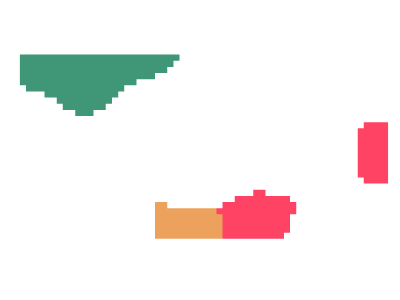

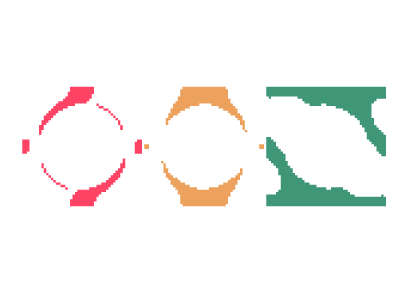

10 Obj:-0.0 Macro_Vol:0.5 Micro_Vol:[0.55, 0.56, 0.55] Macro_ch:0.07 Micro_ch:[0.02, 0.02, 0.02]
11 Obj:-0.0 Macro_Vol:0.5 Micro_Vol:[0.56, 0.56, 0.55] Macro_ch:0.07 Micro_ch:[0.02, 0.01, 0.02]
12 Obj:-0.0 Macro_Vol:0.5 Micro_Vol:[0.56, 0.56, 0.55] Macro_ch:0.07 Micro_ch:[0.01, 0.01, 0.02]
13 Obj:-0.0 Macro_Vol:0.5 Micro_Vol:[0.56, 0.56, 0.55] Macro_ch:0.05 Micro_ch:[0.01, 0.01, 0.02]
14 Obj:-0.0 Macro_Vol:0.5 Micro_Vol:[0.56, 0.56, 0.55] Macro_ch:0.05 Micro_ch:[0.01, 0.01, 0.02]


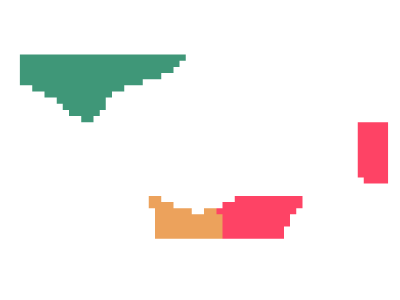

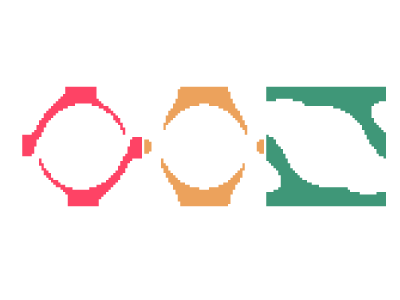

15 Obj:-0.0 Macro_Vol:0.5 Micro_Vol:[0.56, 0.56, 0.55] Macro_ch:0.05 Micro_ch:[0.01, 0.01, 0.02]
16 Obj:-0.0 Macro_Vol:0.5 Micro_Vol:[0.56, 0.56, 0.55] Macro_ch:0.05 Micro_ch:[0.01, 0.01, 0.02]
17 Obj:-0.0 Macro_Vol:0.5 Micro_Vol:[0.56, 0.56, 0.54] Macro_ch:0.05 Micro_ch:[0.01, 0.01, 0.02]
18 Obj:-0.0 Macro_Vol:0.5 Micro_Vol:[0.56, 0.56, 0.54] Macro_ch:0.05 Micro_ch:[0.01, 0.01, 0.02]
19 Obj:-0.0 Macro_Vol:0.5 Micro_Vol:[0.56, 0.56, 0.54] Macro_ch:0.03 Micro_ch:[0.01, 0.01, 0.02]


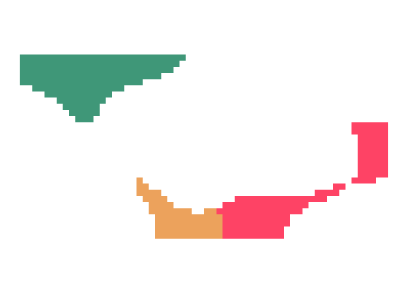

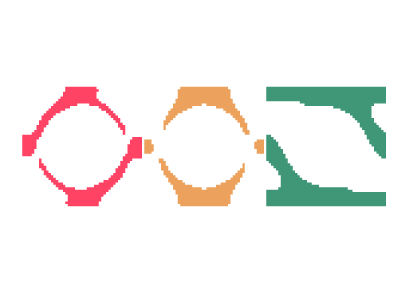

20 Obj:-0.0 Macro_Vol:0.5 Micro_Vol:[0.56, 0.56, 0.54] Macro_ch:0.03 Micro_ch:[0.01, 0.01, 0.02]
1 Obj:-0.0 Macro_Vol:0.5 Micro_Vol:[0.56, 0.56, 0.54] Macro_ch:0.1 Micro_ch:[0.01, 0.01, 0.03]
2 Obj:-0.0 Macro_Vol:0.5 Micro_Vol:[0.56, 0.56, 0.54] Macro_ch:0.1 Micro_ch:[0.01, 0.01, 0.03]
3 Obj:-0.0 Macro_Vol:0.5 Micro_Vol:[0.56, 0.56, 0.54] Macro_ch:0.1 Micro_ch:[0.01, 0.01, 0.03]
4 Obj:-0.0 Macro_Vol:0.5 Micro_Vol:[0.56, 0.56, 0.54] Macro_ch:0.1 Micro_ch:[0.01, 0.01, 0.03]


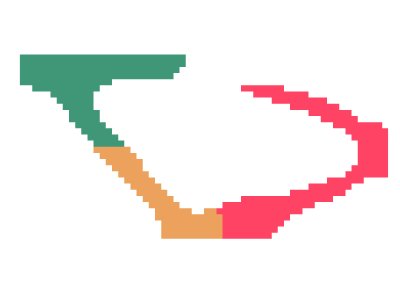

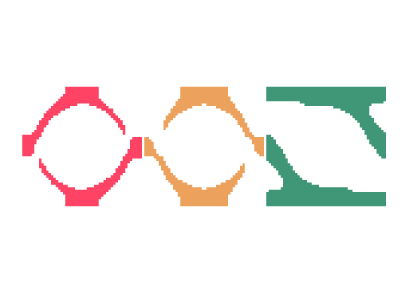

5 Obj:-0.0 Macro_Vol:0.5 Micro_Vol:[0.56, 0.56, 0.54] Macro_ch:0.1 Micro_ch:[0.01, 0.01, 0.03]
6 Obj:-0.0 Macro_Vol:0.5 Micro_Vol:[0.56, 0.56, 0.54] Macro_ch:0.09 Micro_ch:[0.01, 0.01, 0.03]
7 Obj:-0.0 Macro_Vol:0.5 Micro_Vol:[0.56, 0.56, 0.54] Macro_ch:0.1 Micro_ch:[0.01, 0.01, 0.03]
8 Obj:-0.0 Macro_Vol:0.5 Micro_Vol:[0.56, 0.56, 0.54] Macro_ch:0.1 Micro_ch:[0.01, 0.01, 0.03]
9 Obj:-0.0 Macro_Vol:0.5 Micro_Vol:[0.56, 0.56, 0.54] Macro_ch:0.1 Micro_ch:[0.01, 0.01, 0.03]


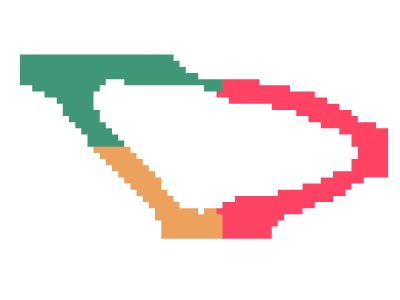

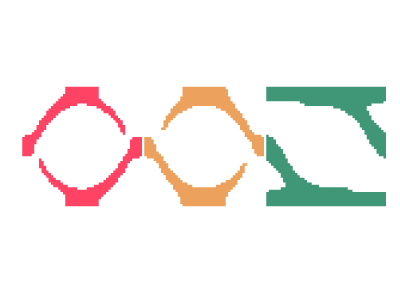

10 Obj:-0.0 Macro_Vol:0.5 Micro_Vol:[0.56, 0.56, 0.54] Macro_ch:0.09 Micro_ch:[0.01, 0.01, 0.03]
11 Obj:-0.0 Macro_Vol:0.5 Micro_Vol:[0.56, 0.56, 0.54] Macro_ch:0.09 Micro_ch:[0.01, 0.01, 0.02]
12 Obj:-0.0 Macro_Vol:0.5 Micro_Vol:[0.56, 0.56, 0.54] Macro_ch:0.08 Micro_ch:[0.01, 0.01, 0.02]
13 Obj:-0.0 Macro_Vol:0.5 Micro_Vol:[0.56, 0.56, 0.54] Macro_ch:0.09 Micro_ch:[0.01, 0.01, 0.02]
14 Obj:-0.0 Macro_Vol:0.5 Micro_Vol:[0.56, 0.56, 0.54] Macro_ch:0.1 Micro_ch:[0.01, 0.01, 0.02]


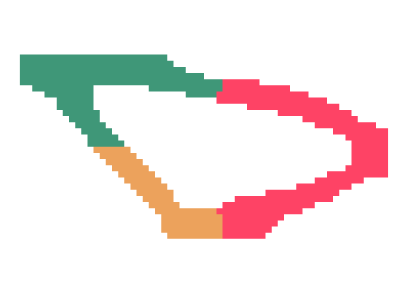

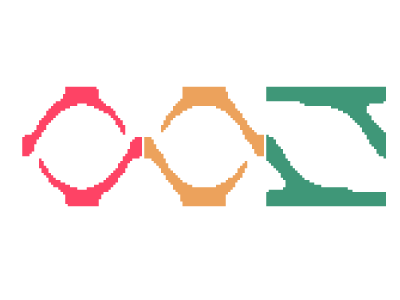

15 Obj:-0.0 Macro_Vol:0.5 Micro_Vol:[0.56, 0.56, 0.54] Macro_ch:0.07 Micro_ch:[0.01, 0.01, 0.02]
16 Obj:-0.0 Macro_Vol:0.5 Micro_Vol:[0.56, 0.56, 0.54] Macro_ch:0.08 Micro_ch:[0.01, 0.01, 0.02]
17 Obj:-0.0 Macro_Vol:0.5 Micro_Vol:[0.56, 0.56, 0.54] Macro_ch:0.08 Micro_ch:[0.01, 0.01, 0.02]
18 Obj:-0.0 Macro_Vol:0.5 Micro_Vol:[0.56, 0.56, 0.54] Macro_ch:0.08 Micro_ch:[0.01, 0.01, 0.02]
19 Obj:-0.0 Macro_Vol:0.5 Micro_Vol:[0.56, 0.56, 0.54] Macro_ch:0.08 Micro_ch:[0.01, 0.01, 0.02]


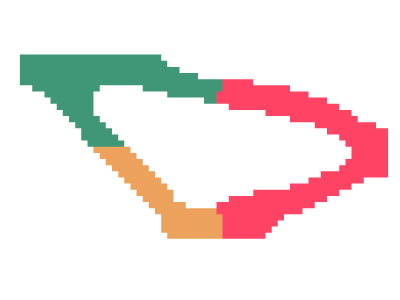

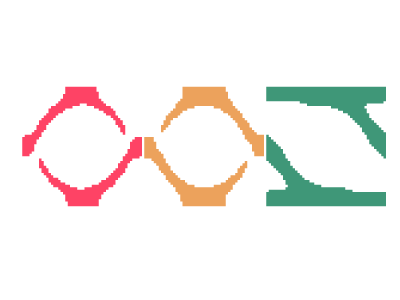

20 Obj:-0.0 Macro_Vol:0.5 Micro_Vol:[0.56, 0.56, 0.54] Macro_ch:0.08 Micro_ch:[0.01, 0.01, 0.02]
1 Obj:-0.0 Macro_Vol:0.5 Micro_Vol:[0.56, 0.56, 0.54] Macro_ch:0.1 Micro_ch:[0.01, 0.02, 0.03]
2 Obj:-0.0 Macro_Vol:0.5 Micro_Vol:[0.56, 0.56, 0.54] Macro_ch:0.1 Micro_ch:[0.01, 0.02, 0.03]
3 Obj:-0.0 Macro_Vol:0.5 Micro_Vol:[0.56, 0.56, 0.54] Macro_ch:0.1 Micro_ch:[0.01, 0.02, 0.03]
4 Obj:-0.0 Macro_Vol:0.5 Micro_Vol:[0.56, 0.56, 0.54] Macro_ch:0.1 Micro_ch:[0.01, 0.02, 0.03]


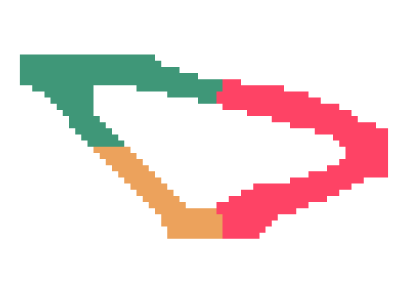

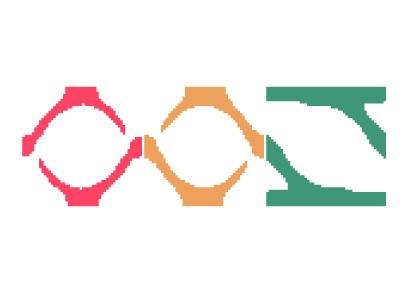

5 Obj:-0.0 Macro_Vol:0.5 Micro_Vol:[0.56, 0.56, 0.54] Macro_ch:0.1 Micro_ch:[0.01, 0.02, 0.03]
6 Obj:-0.0 Macro_Vol:0.5 Micro_Vol:[0.56, 0.56, 0.54] Macro_ch:0.1 Micro_ch:[0.01, 0.02, 0.03]
7 Obj:-0.0 Macro_Vol:0.5 Micro_Vol:[0.56, 0.56, 0.54] Macro_ch:0.09 Micro_ch:[0.01, 0.02, 0.03]
8 Obj:-0.0 Macro_Vol:0.5 Micro_Vol:[0.56, 0.56, 0.54] Macro_ch:0.1 Micro_ch:[0.01, 0.02, 0.03]
9 Obj:-0.0 Macro_Vol:0.5 Micro_Vol:[0.56, 0.56, 0.54] Macro_ch:0.1 Micro_ch:[0.01, 0.02, 0.03]


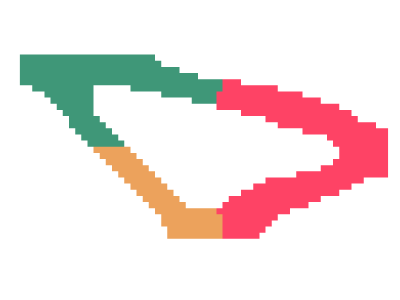

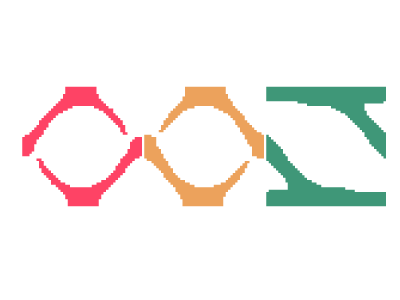

10 Obj:-0.0 Macro_Vol:0.5 Micro_Vol:[0.56, 0.56, 0.54] Macro_ch:0.09 Micro_ch:[0.01, 0.02, 0.02]
11 Obj:-0.0 Macro_Vol:0.5 Micro_Vol:[0.56, 0.56, 0.54] Macro_ch:0.08 Micro_ch:[0.01, 0.02, 0.02]
12 Obj:-0.0 Macro_Vol:0.5 Micro_Vol:[0.56, 0.56, 0.54] Macro_ch:0.08 Micro_ch:[0.01, 0.02, 0.02]
13 Obj:-0.0 Macro_Vol:0.5 Micro_Vol:[0.56, 0.56, 0.54] Macro_ch:0.09 Micro_ch:[0.01, 0.02, 0.02]
14 Obj:-0.0 Macro_Vol:0.5 Micro_Vol:[0.56, 0.56, 0.54] Macro_ch:0.09 Micro_ch:[0.01, 0.02, 0.02]


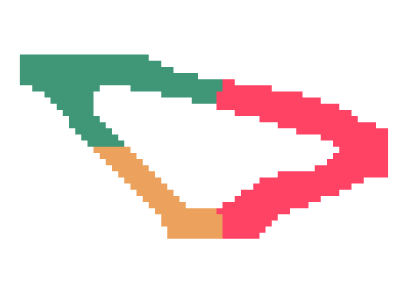

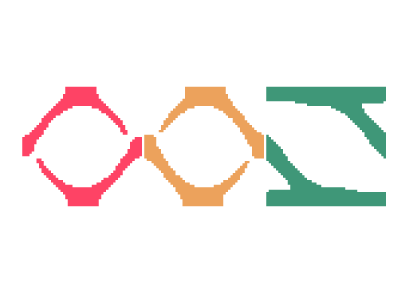

15 Obj:-0.0 Macro_Vol:0.5 Micro_Vol:[0.56, 0.56, 0.54] Macro_ch:0.09 Micro_ch:[0.01, 0.02, 0.02]
16 Obj:-0.0 Macro_Vol:0.5 Micro_Vol:[0.56, 0.56, 0.54] Macro_ch:0.07 Micro_ch:[0.01, 0.01, 0.02]
17 Obj:-0.0 Macro_Vol:0.5 Micro_Vol:[0.56, 0.55, 0.54] Macro_ch:0.07 Micro_ch:[0.01, 0.01, 0.02]
18 Obj:-0.0 Macro_Vol:0.5 Micro_Vol:[0.56, 0.55, 0.54] Macro_ch:0.09 Micro_ch:[0.01, 0.01, 0.02]
19 Obj:-0.0 Macro_Vol:0.5 Micro_Vol:[0.56, 0.55, 0.54] Macro_ch:0.08 Micro_ch:[0.01, 0.01, 0.02]


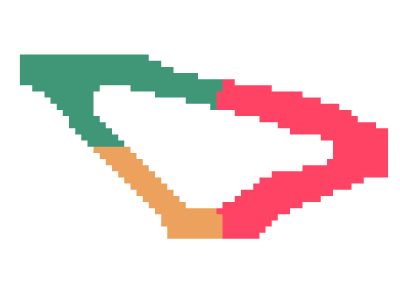

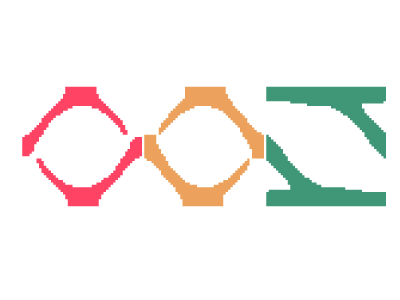

20 Obj:-0.0 Macro_Vol:0.5 Micro_Vol:[0.56, 0.55, 0.54] Macro_ch:0.07 Micro_ch:[0.01, 0.01, 0.02]
1 Obj:-0.0 Macro_Vol:0.5 Micro_Vol:[0.56, 0.55, 0.54] Macro_ch:0.1 Micro_ch:[0.02, 0.02, 0.03]
2 Obj:-0.0 Macro_Vol:0.5 Micro_Vol:[0.56, 0.55, 0.54] Macro_ch:0.1 Micro_ch:[0.02, 0.02, 0.03]
3 Obj:-0.0 Macro_Vol:0.5 Micro_Vol:[0.56, 0.55, 0.54] Macro_ch:0.1 Micro_ch:[0.02, 0.02, 0.03]
4 Obj:-0.0 Macro_Vol:0.5 Micro_Vol:[0.56, 0.55, 0.54] Macro_ch:0.09 Micro_ch:[0.02, 0.02, 0.03]


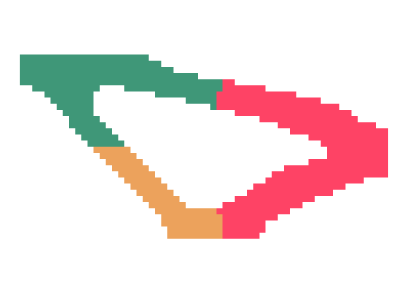

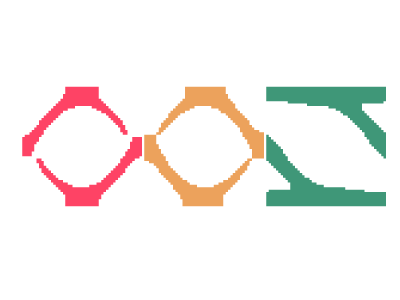

5 Obj:-0.0 Macro_Vol:0.5 Micro_Vol:[0.56, 0.55, 0.54] Macro_ch:0.09 Micro_ch:[0.02, 0.02, 0.03]
6 Obj:-0.0 Macro_Vol:0.5 Micro_Vol:[0.56, 0.55, 0.54] Macro_ch:0.1 Micro_ch:[0.02, 0.02, 0.03]
7 Obj:-0.0 Macro_Vol:0.5 Micro_Vol:[0.56, 0.55, 0.54] Macro_ch:0.09 Micro_ch:[0.02, 0.02, 0.03]
8 Obj:-0.0 Macro_Vol:0.5 Micro_Vol:[0.56, 0.55, 0.54] Macro_ch:0.08 Micro_ch:[0.02, 0.02, 0.03]
9 Obj:-0.0 Macro_Vol:0.5 Micro_Vol:[0.56, 0.55, 0.54] Macro_ch:0.07 Micro_ch:[0.02, 0.02, 0.02]


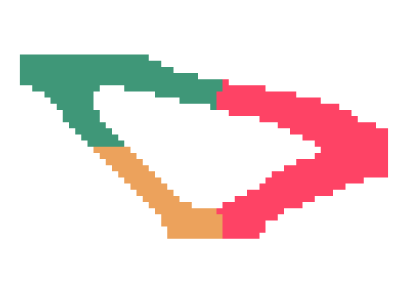

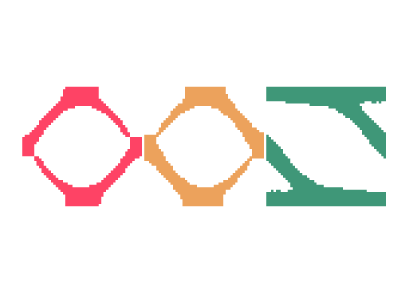

10 Obj:-0.0 Macro_Vol:0.5 Micro_Vol:[0.56, 0.55, 0.54] Macro_ch:0.08 Micro_ch:[0.02, 0.02, 0.02]
11 Obj:-0.0 Macro_Vol:0.5 Micro_Vol:[0.56, 0.55, 0.54] Macro_ch:0.08 Micro_ch:[0.02, 0.02, 0.02]
12 Obj:-0.0 Macro_Vol:0.5 Micro_Vol:[0.56, 0.55, 0.54] Macro_ch:0.08 Micro_ch:[0.02, 0.02, 0.02]
13 Obj:-0.0 Macro_Vol:0.5 Micro_Vol:[0.56, 0.55, 0.54] Macro_ch:0.07 Micro_ch:[0.02, 0.02, 0.02]
14 Obj:-0.0 Macro_Vol:0.5 Micro_Vol:[0.56, 0.55, 0.54] Macro_ch:0.07 Micro_ch:[0.02, 0.02, 0.02]


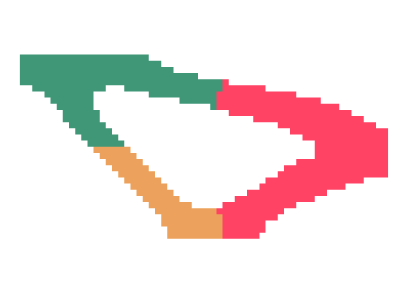

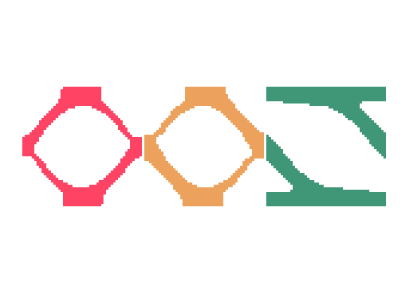

15 Obj:-0.0 Macro_Vol:0.5 Micro_Vol:[0.56, 0.55, 0.54] Macro_ch:0.06 Micro_ch:[0.02, 0.02, 0.02]
16 Obj:-0.0 Macro_Vol:0.5 Micro_Vol:[0.56, 0.55, 0.54] Macro_ch:0.07 Micro_ch:[0.02, 0.02, 0.02]
17 Obj:-0.0 Macro_Vol:0.5 Micro_Vol:[0.56, 0.55, 0.54] Macro_ch:0.08 Micro_ch:[0.02, 0.01, 0.02]
18 Obj:-0.0 Macro_Vol:0.5 Micro_Vol:[0.55, 0.55, 0.54] Macro_ch:0.08 Micro_ch:[0.02, 0.01, 0.02]
19 Obj:-0.0 Macro_Vol:0.5 Micro_Vol:[0.55, 0.55, 0.54] Macro_ch:0.06 Micro_ch:[0.01, 0.01, 0.02]


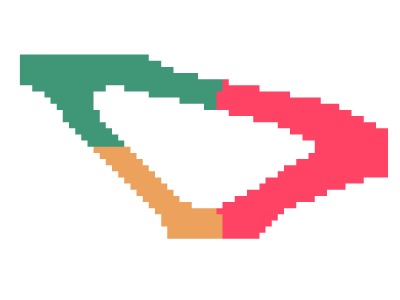

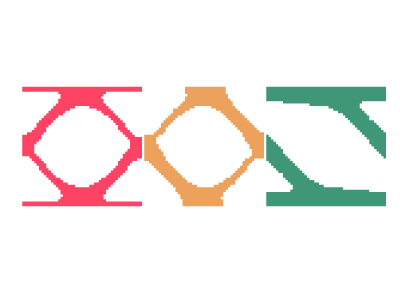

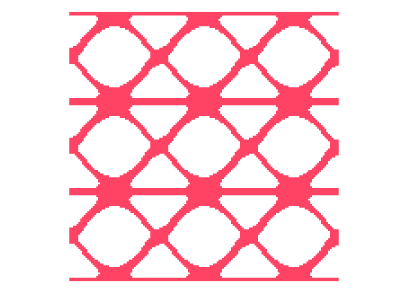

"young:[0.198, 0.139], poisson:[0.385, 0.271], shear:[0.058]"

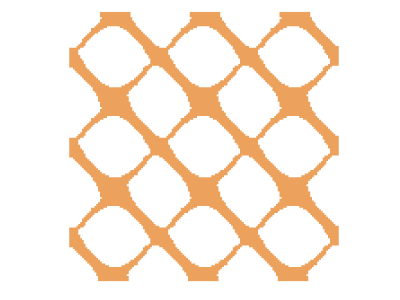

"young:[0.18, 0.14], poisson:[0.402, 0.313], shear:[0.061]"

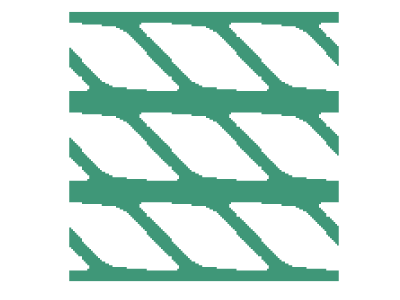

"young:[0.243, 0.083], poisson:[0.256, 0.087], shear:[0.038]"

20 Obj:-0.0 Macro_Vol:0.5 Micro_Vol:[0.55, 0.55, 0.54] Macro_ch:0.07 Micro_ch:[0.01, 0.01, 0.01]


In [258]:
# micro mma
Macro_anim=Animation()
Micro_anim=Animation()

Macro_struct = [6, 3, 60, 30, [0.5,0.5],5.0];
Micro_struct = [0.1, 0.1, 50, 50,0.5,2.0];
penal = 3; 
saveItr=5;
θ=3
prob=wing2D
maxloop=20

con=false

Macro_xPhys3,Micro_xPhys3,Macro_masks3,Macro_xPhys_diag3,Micro_Vol3,DHs3=CompliantMultiConTop2DU(θ,Macro_struct, Micro_struct,prob, penal,saveItr,maxloop,con);
